In [7]:
import pandas as pd
df=pd.read_csv("/content/data.csv")
df

,match_day,name,hand,score,attempts
0,1,Arielle,R,8,20
1,2,Arielle,R,10,20
2,3,Arielle,R,6,20
3,4,Arielle,L,4,20
4,5,Arielle,R,7,20
...,...,...,...,...,...
95,46,Boris,R,10,20
96,47,Boris,L,4,20
97,48,Boris,R,12,20
98,49,Boris,L,4,20


In [8]:
df["successful_attempt"] = (df["score"]/df["attempts"])*100
df

,match_day,name,hand,score,attempts,successful_attempt
0,1,Arielle,R,8,20,40.0
1,2,Arielle,R,10,20,50.0
2,3,Arielle,R,6,20,30.0
3,4,Arielle,L,4,20,20.0
4,5,Arielle,R,7,20,35.0
...,...,...,...,...,...,...
95,46,Boris,R,10,20,50.0
96,47,Boris,L,4,20,20.0
97,48,Boris,R,12,20,60.0
98,49,Boris,L,4,20,20.0


In [9]:
df_grouped = df.groupby('match_day').agg({'successful_attempt': ['max']}).reset_index()
df_grouped['successful_attempt'].values[1][0]

50.0

In [10]:
match_day_list = df_grouped.match_day.values.tolist()
successful_attempt_list = []
for k in range (0,df_grouped.shape[0]):
    successful_attempt_list.append(df_grouped['successful_attempt'].values[k][0])
successful_attempt_list

[40.0,
 50.0,
 50.0,
 20.0,
 35.0,
 45.0,
 50.0,
 25.0,
 65.0,
 40.0,
 30.0,
 30.0,
 35.0,
 50.0,
 45.0,
 50.0,
 45.0,
 35.0,
 40.0,
 40.0,
 45.0,
 20.0,
 35.0,
 50.0,
 35.0,
 35.0,
 40.0,
 25.0,
 50.0,
 40.0,
 55.00000000000001,
 25.0,
 40.0,
 55.00000000000001,
 40.0,
 50.0,
 40.0,
 45.0,
 55.00000000000001,
 40.0,
 30.0,
 50.0,
 40.0,
 55.00000000000001,
 35.0,
 50.0,
 20.0,
 60.0,
 20.0,
 40.0]

In [11]:
winner_name,winner_hand =[],[]
for i in range(0,len(match_day_list)):
#     print(i)
    match_day_list_i = match_day_list[i]
    successful_attempt_list_i = successful_attempt_list[i]
    val = df.query('match_day == @  match_day_list_i and successful_attempt == @ successful_attempt_list_i')[['name','hand']]
    winner_name.append(val['name'].values.tolist()[0])
    winner_hand.append(val['hand'].values.tolist()[0])

In [12]:
data_df = pd.DataFrame(list(zip(match_day_list, winner_name,winner_hand,successful_attempt_list)), columns = ["match_day", "winner_name","winner_hand","percentage_successful_attempt"])
data_df

,match_day,winner_name,winner_hand,percentage_successful_attempt
0,1,Arielle,R,40.0
1,2,Arielle,R,50.0
2,3,Boris,L,50.0
3,4,Arielle,L,20.0
4,5,Arielle,R,35.0
5,6,Arielle,R,45.0
6,7,Boris,R,50.0
7,8,Arielle,L,25.0
8,9,Arielle,R,65.0
9,10,Arielle,R,40.0


In [13]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

In [14]:
data = data_df
print(data.isna().sum())
print(data.isnull().sum())
print(data.dtypes)
def valcount(data,colname):
    print("value count {} freqrange {}".format(colname,data[colname].value_counts(normalize=True)))

valcount(data,'winner_name')

match_day                        0
winner_name                      0
winner_hand                      0
percentage_successful_attempt    0
dtype: int64
match_day                        0
winner_name                      0
winner_hand                      0
percentage_successful_attempt    0
dtype: int64
match_day                          int64
winner_name                       object
winner_hand                       object
percentage_successful_attempt    float64
dtype: object
value count winner_name freqrange Arielle    0.54
Boris      0.46
Name: winner_name, dtype: float64


In [15]:
cust_data=data.drop(['winner_name','winner_hand','match_day'] , axis=1)
print("shape\n",cust_data.shape) # see the shape of the cust_data
print("Info\n",cust_data.info())
print("Mean\n",cust_data.mean())
print("Mode\n",cust_data.mode())
print("median\n",cust_data.median())
print("cust_data_quantile(25%):\n",cust_data.quantile(q=0.25))
print("cust_data_quantile(50%):\n",cust_data.quantile(q=0.50))
print("cust_data_quantile(75%):\n",cust_data.quantile(q=0.75))
print("describe\n",cust_data.describe())
#         print("IQR"+colname+"\n",cust_data[colname2].quantile(0.75) - cust_data[colname2].quantile(0.25))
print("IQR\n",cust_data.quantile(0.75) - cust_data.quantile(0.25))
Q1 = cust_data.quantile(0.25)
Q3 = cust_data.quantile(0.75)
IQR = Q3 - Q1
print("Outlier sum\n",((cust_data < (Q1 - 1.5 * IQR)) | (cust_data > (Q3 + 1.5 * IQR))).sum())
print("Range\n",cust_data.max() - cust_data.min())
print("variance\n",cust_data.var())
print("std\n",cust_data.std())
print("cov\n",cust_data.cov())
print("corr\n",cust_data.corr())
print("skew\n",cust_data.skew())
print("kurt\n",cust_data.kurt())

shape
 (50, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   percentage_successful_attempt  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes
Info
 None
Mean
 percentage_successful_attempt    40.8
dtype: float64
Mode
    percentage_successful_attempt
0                           40.0
median
 percentage_successful_attempt    40.0
dtype: float64
cust_data_quantile(25%):
 percentage_successful_attempt    35.0
Name: 0.25, dtype: float64
cust_data_quantile(50%):
 percentage_successful_attempt    40.0
Name: 0.5, dtype: float64
cust_data_quantile(75%):
 percentage_successful_attempt    50.0
Name: 0.75, dtype: float64
describe
        percentage_successful_attempt
count                      50.000000
mean                       40.800000
std                        10.849621
min                      

In [16]:
data.dtypes

match_day                          int64
winner_name                       object
winner_hand                       object
percentage_successful_attempt    float64
dtype: object

In [17]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: winner_name
['Arielle', 'Boris']
Categories (2, object): ['Arielle', 'Boris']
[0 1]


feature: winner_hand
['R', 'L']
Categories (2, object): ['L', 'R']
[1 0]


In [18]:
print(data.duplicated().sum())

0


In [19]:
sns.set()
sns.set_style("whitegrid") 
sns.set_style("ticks", 
{"xtick.major.size":8,
"ytick.major.size":8})
sns.axes_style("whitegrid")

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

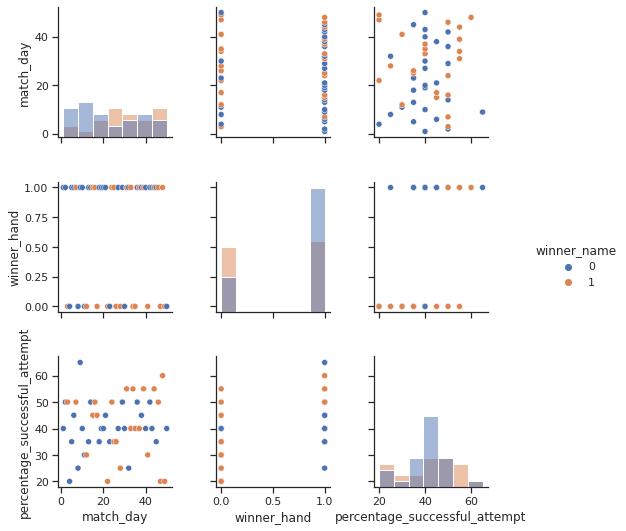

<Figure size 432x288 with 0 Axes>

In [20]:
sns.pairplot(data,hue='winner_name',diag_kind='hist')
plt.figure()
plt.savefig('/content/drive/MyDrive/pairplot.png')

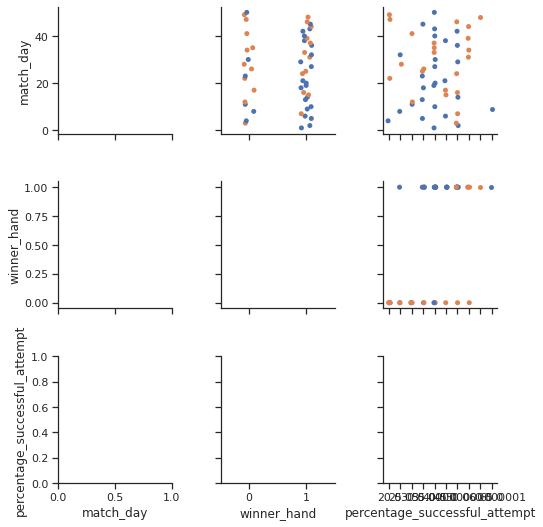

<Figure size 432x288 with 0 Axes>

In [21]:
g = sns.PairGrid(data,hue='winner_name')
g = g.map_upper(sns.stripplot)
plt.figure()
plt.savefig('/content/drive/MyDrive/pairstripplot.png')

In [22]:
from mpl_toolkits.mplot3d import Axes3D
cat=['winner_name','winner_hand']
for i in range(len(cat)):
    for j in range(len(cat)-1):
        for k in range(len(cat)-2):
            plt.figure()
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d') 
            ax.scatter(data[cat[i]], data[cat[j+1]], data[cat[k+2]],c=['r'],marker = 'o')
            ax.set_xlabel(cat[i])
            ax.set_ylabel(cat[j+1])
            ax.set_zlabel(cat[k+2])
            plt.show()
            plt.savefig('/content/drive/MyDrive/3dfig'+str(i)+str(j)+str(k)+'.jpg')

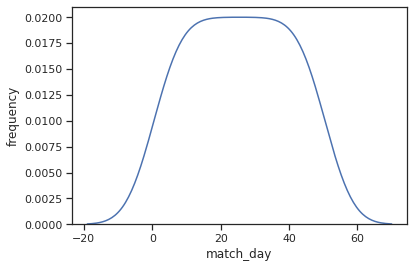

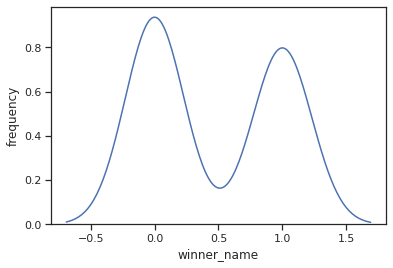

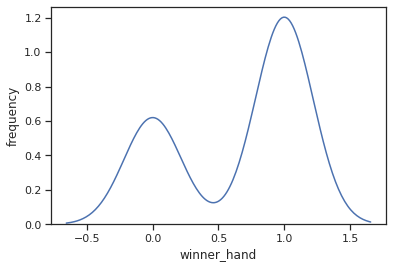

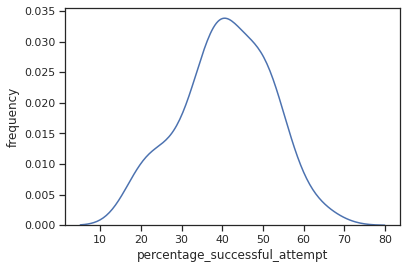

In [23]:
def distplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            plt.figure()
            sns.distplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.savefig('/content/drive/MyDrive/distplot'+str(i)+'.png')
distplot(data)

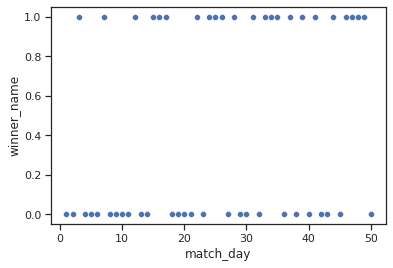

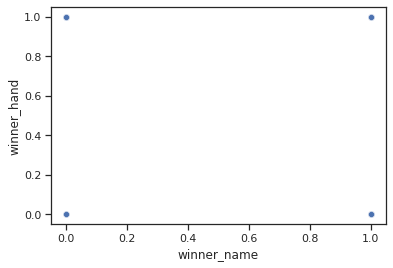

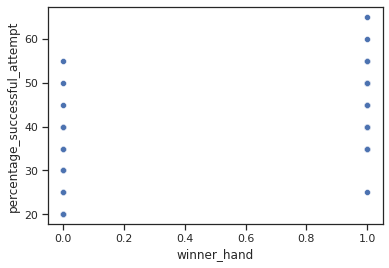

In [24]:
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,3):
            plt.figure()
            sns.scatterplot(data.iloc[:,i], data.iloc[:,i+1]) 
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.savefig('/content/drive/MyDrive/multiscatplot'+str(i)+'.png')
multiscatplot(data)

                               match_day  ...  percentage_successful_attempt
match_day                       1.000000  ...                       0.023872
winner_name                     0.257219  ...                       0.062020
winner_hand                    -0.019017  ...                       0.525167
percentage_successful_attempt   0.023872  ...                       1.000000

[4 rows x 4 columns]


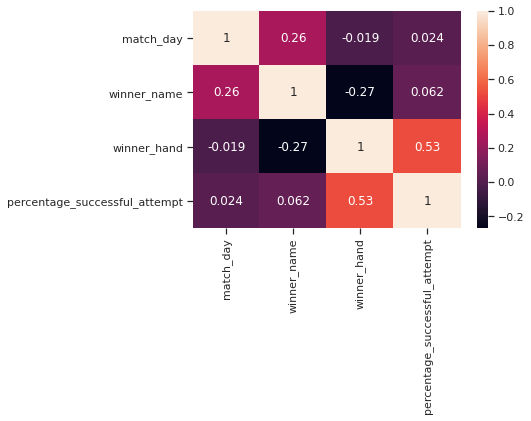

<Figure size 432x288 with 0 Axes>

In [25]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)
plt.figure()
plt.savefig('/content/drive/MyDrive/heatmap.png')

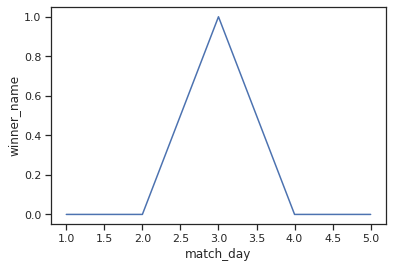

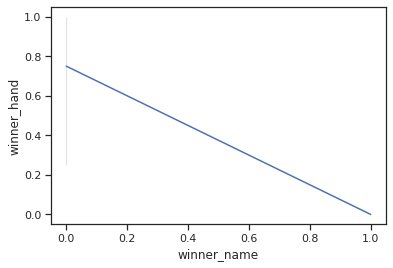

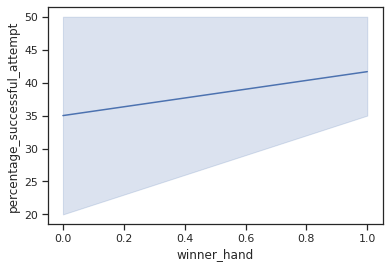

In [26]:
def lineplot(data):
        colnames=list(data.columns.values)
        for i in range(0,3):
            plt.figure()
            sns.lineplot(x=colnames[i], y=colnames[i+1], data=data.head())
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.savefig('/content/drive/MyDrive/lineplot'+str(i)+'.png')
lineplot(data)

<Figure size 432x288 with 0 Axes>

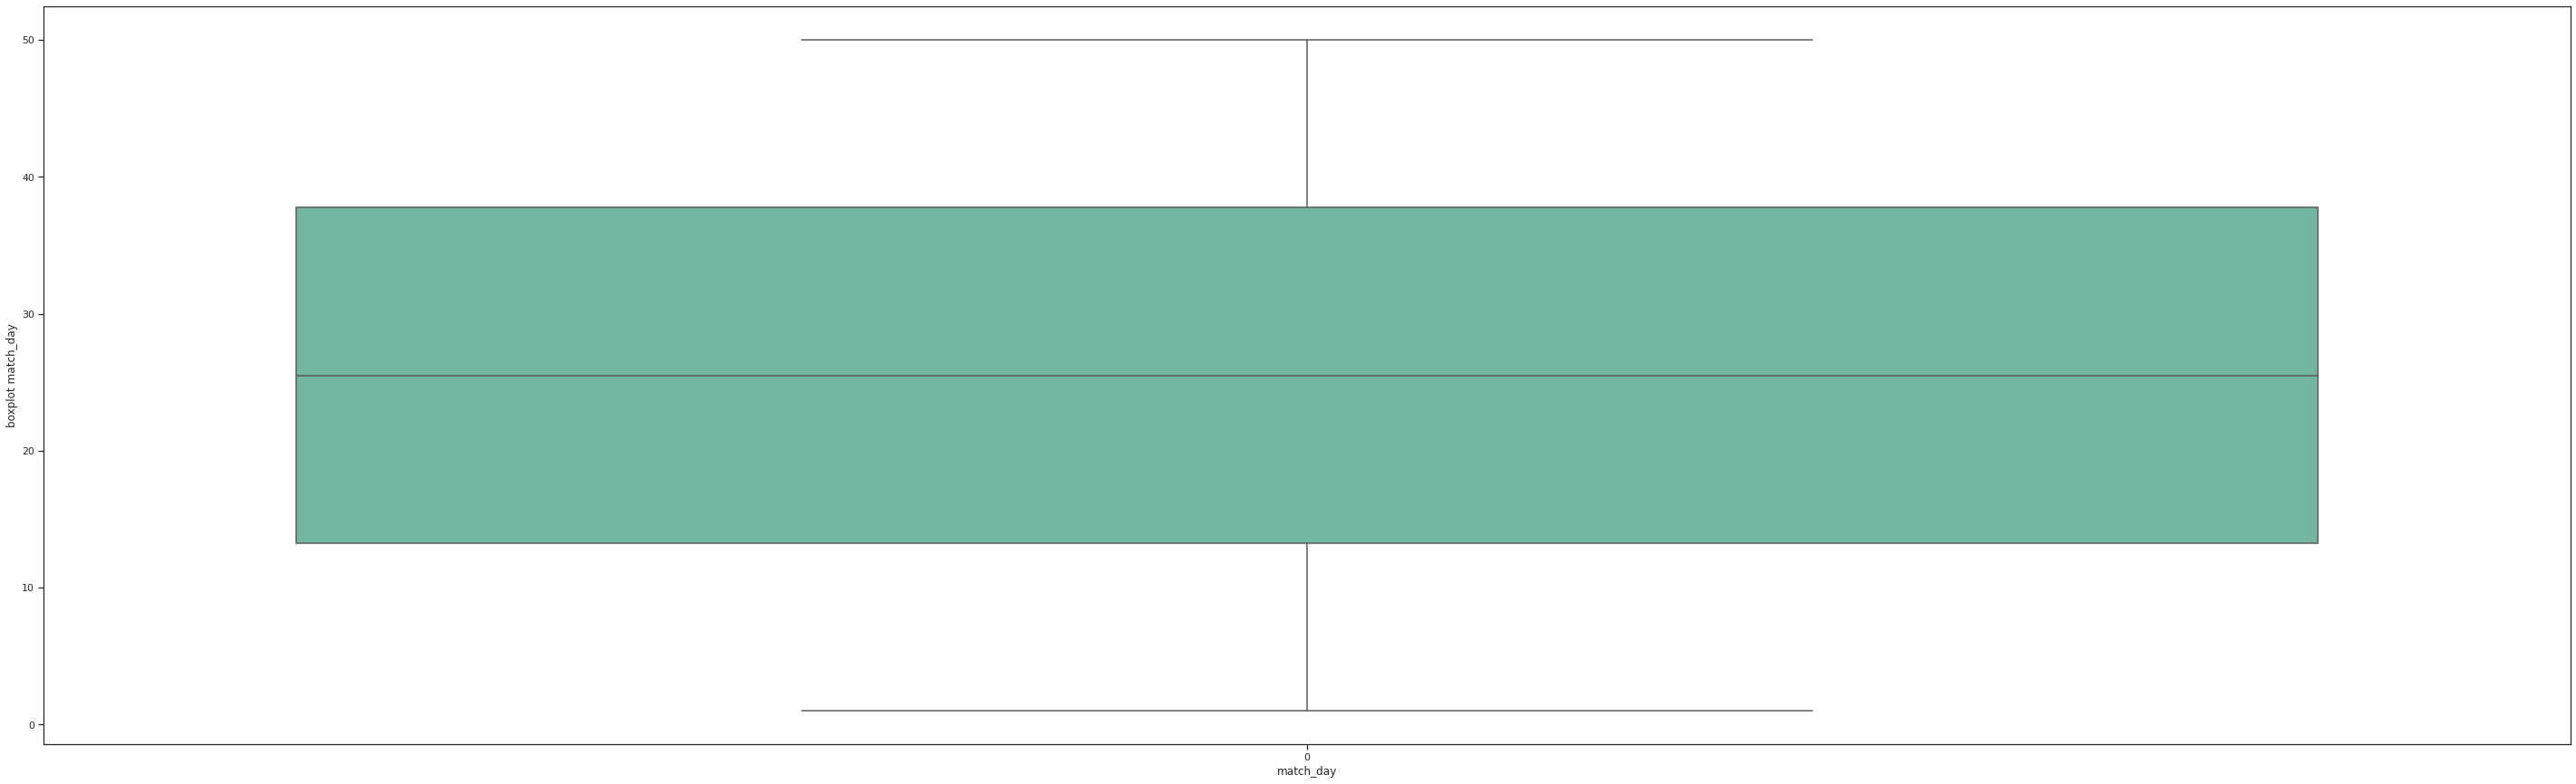

<Figure size 432x288 with 0 Axes>

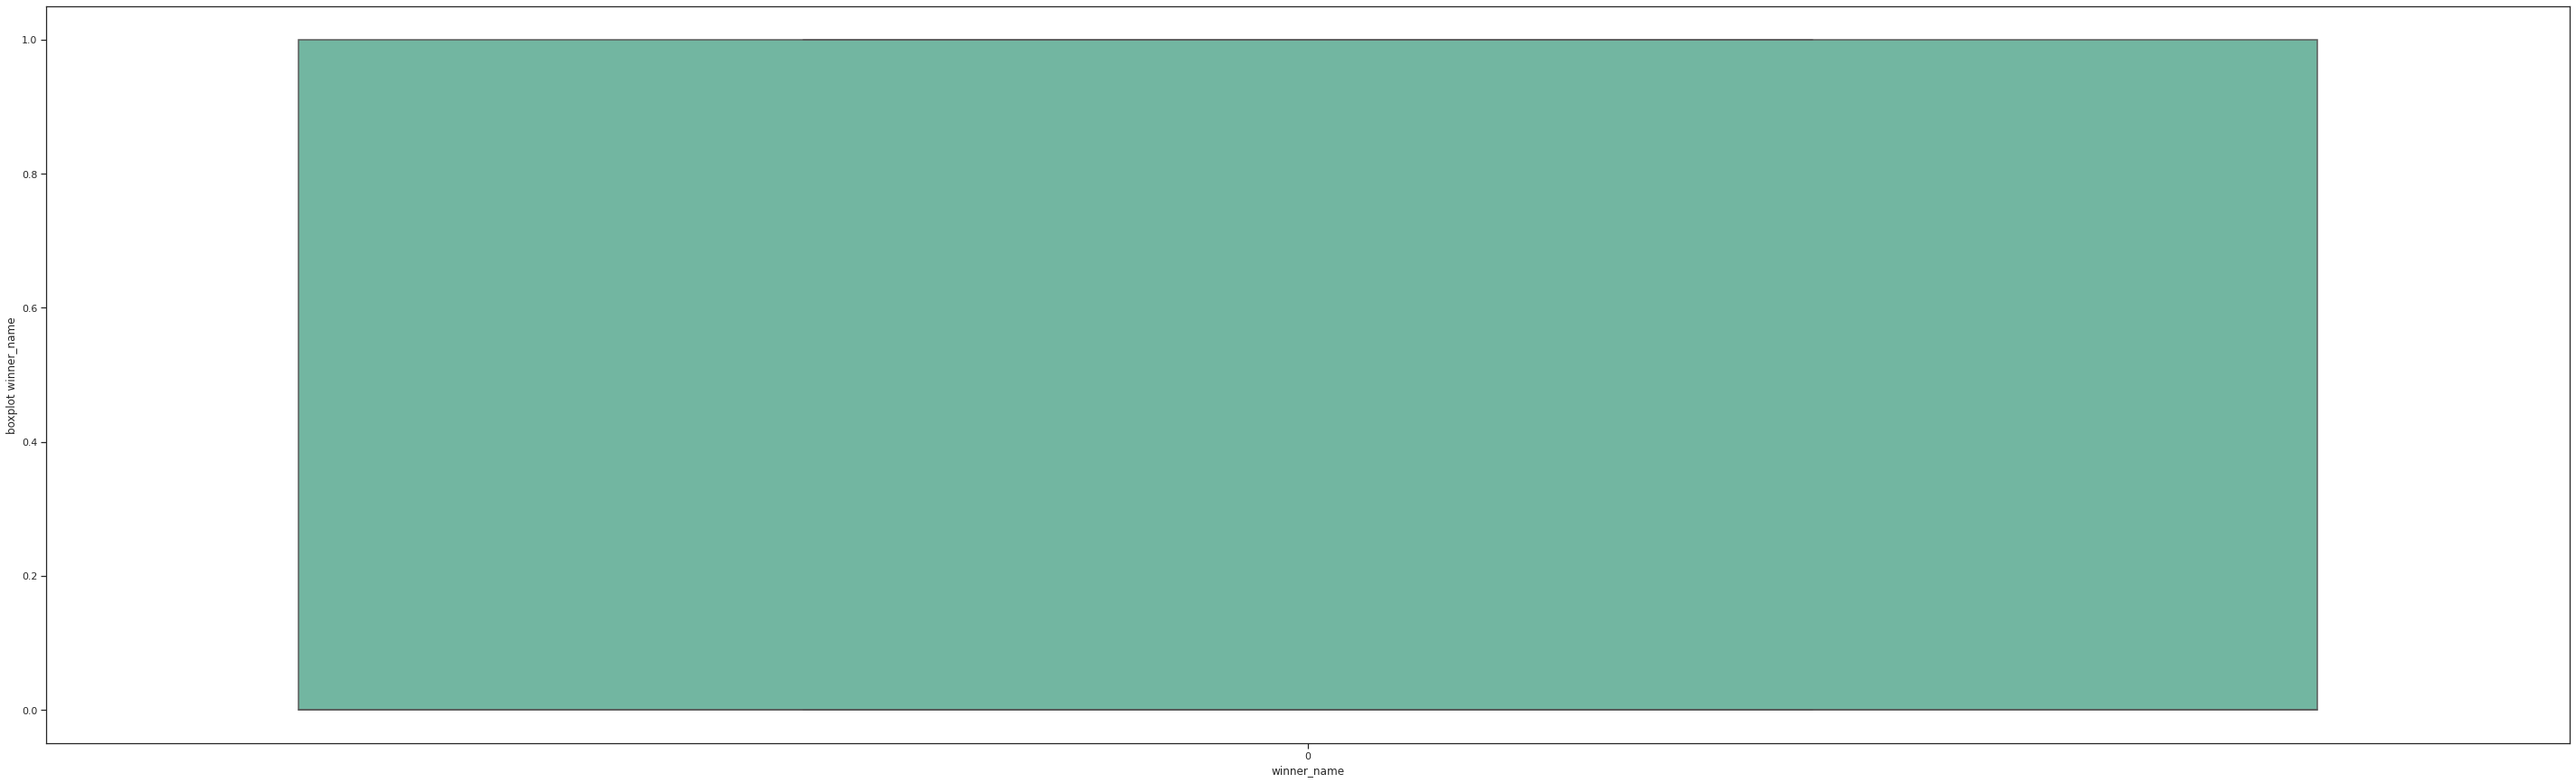

<Figure size 432x288 with 0 Axes>

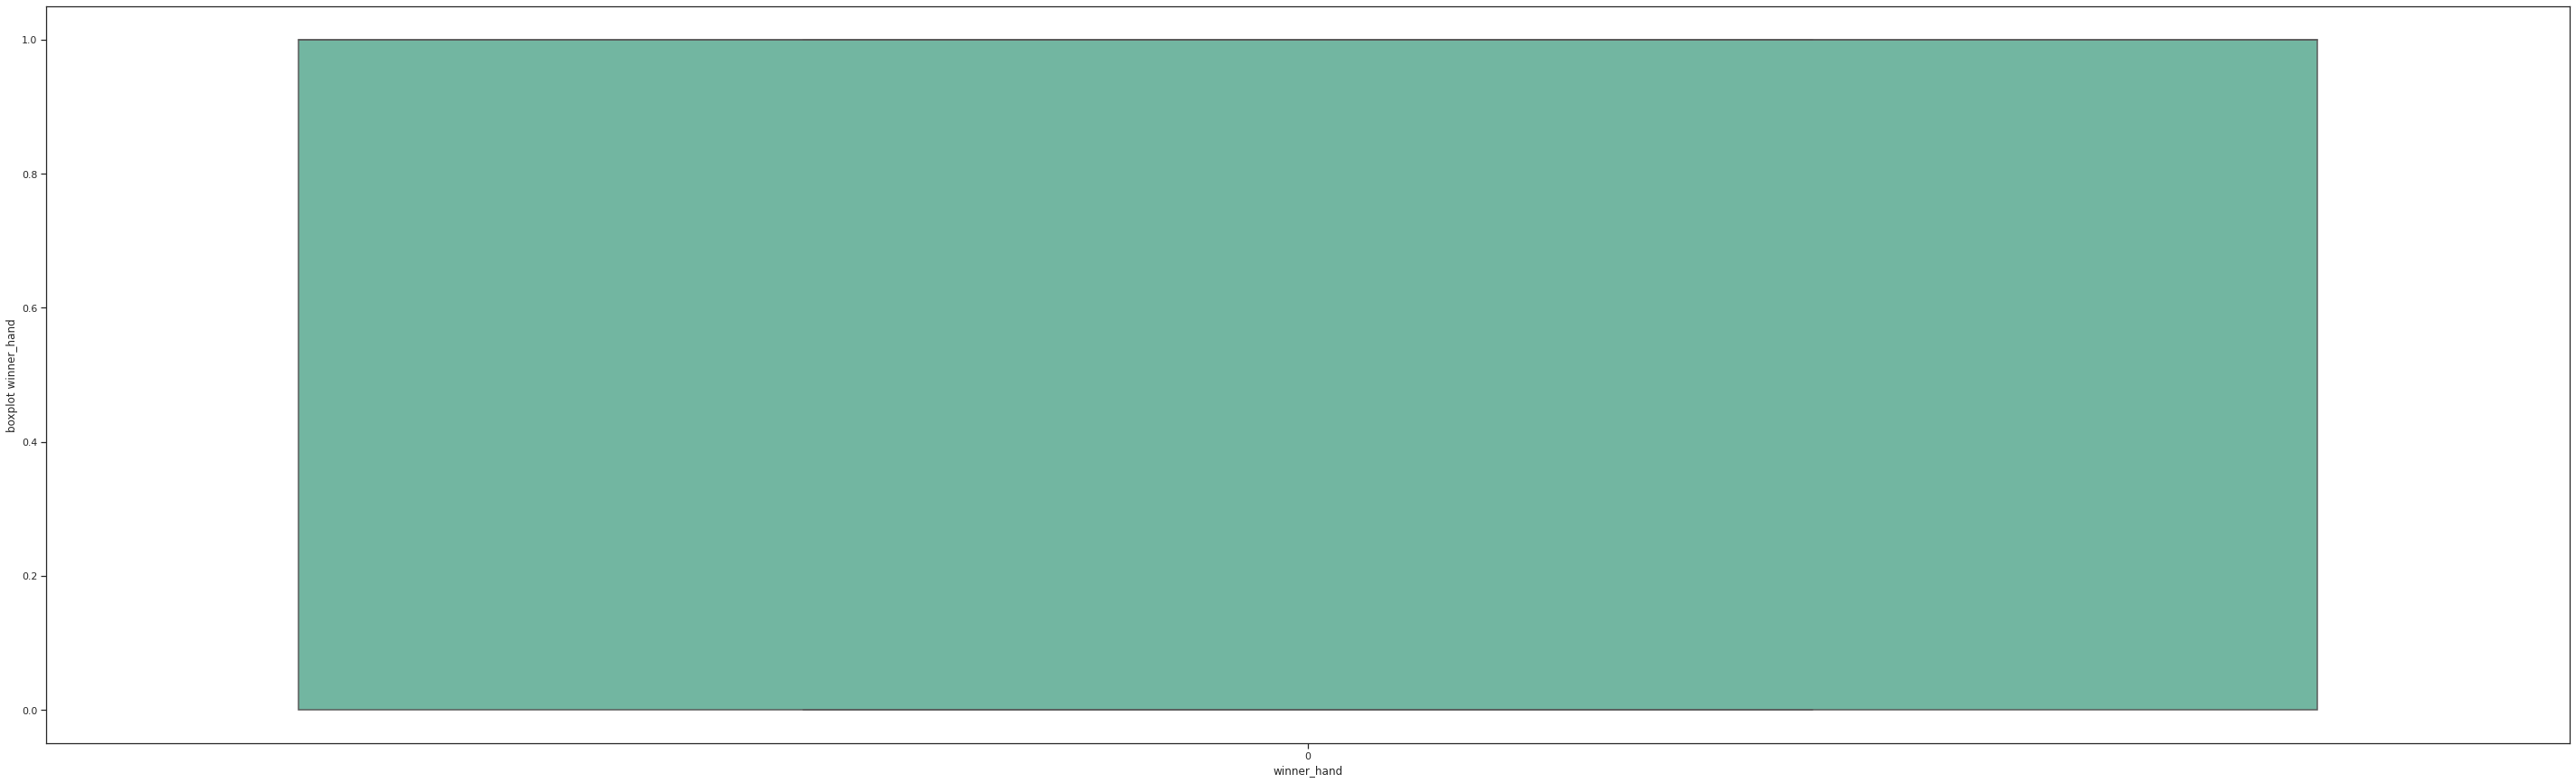

<Figure size 432x288 with 0 Axes>

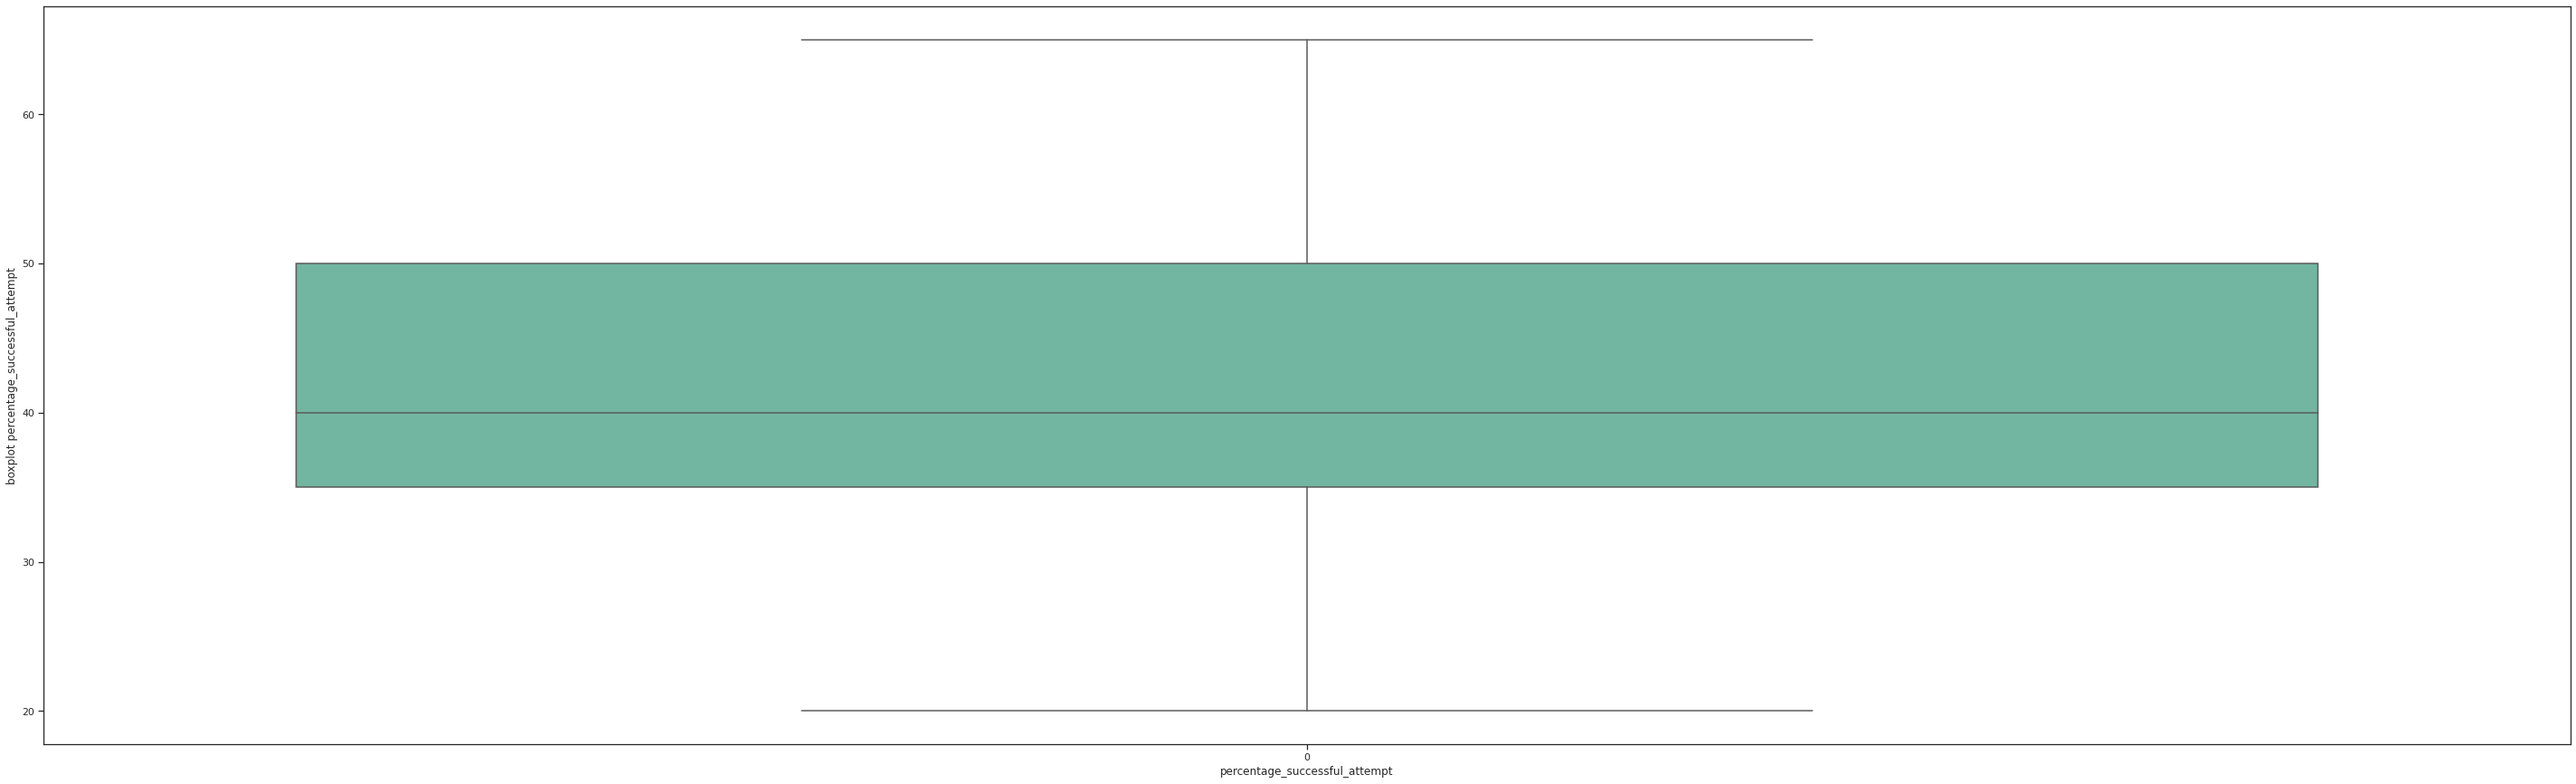

In [27]:
def boxplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            plt.figure()
            figure = plt.figure(figsize=(50,15))
            sns.boxplot(data=data[colnames[i]], orient="v", palette="Set2")
            plt.xlabel(colnames[i])
            plt.ylabel("boxplot "+colnames[i])
            plt.savefig('/content/drive/MyDrive/boxplot'+str(i)+'.png')
boxplot(data)

In [28]:
data1=data.drop(["winner_name"],axis=1)
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum())
# def remove_outlier(col):
#         sorted(col)
#         Q1,Q3=np.percentile(col,[25,75])
#         IQR=Q3-Q1
#         lower_range= Q1-(1.5 * IQR)
#         upper_range= Q3+(1.5 * IQR)
#         return lower_range, upper_range
# def outlrem():
#         print(data1.shape)
#         for column in data1.iloc[:, 0:data1.shape[1]].columns:
#             lr,ur=remove_outlier(data1[column])
#             data1[column]=np.where(data1[column]>ur,ur,data1[column])
#             data1[column]=np.where(data1[column]<lr,lr,data1[column])

#         Q1 = data1.quantile(0.25)
#         Q3 = data1.quantile(0.75)
#         IQR = Q3 - Q1
#         print("After removing Outlier sum\n",((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).sum())
# outlrem()
# print("isnull sum\n",data1.isnull().sum())
# print("isna sum\n",data1.isna().sum())
# # data1.to_csv('clean.csv')
# print(data1.head(5))
# print(data1.dtypes)

Before removing Outlier sum
 match_day                        0
winner_hand                      0
percentage_successful_attempt    0
dtype: int64


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(data.values, ix) for ix in range(data.shape[1])] 
i=0
for column in data.columns:
    if i < 20:
        print (column ,"--->",  vif[i])
        i = i+1

match_day ---> 3.834459299662269
winner_name ---> 2.282403106707015
winner_hand ---> 4.578949983067109
percentage_successful_attempt ---> 8.509054477199378


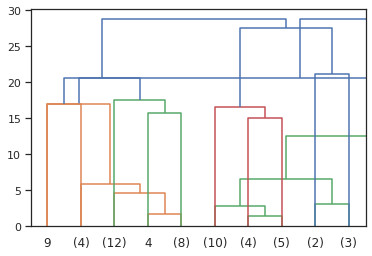

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_method = linkage(data.iloc[:,0:4], method = 'average')
labelList = np.array(data["match_day"])
dend = dendrogram(link_method,labels = labelList)
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 labels = labelList 
                 )


In [31]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link_method, 3, criterion='maxclust')
datac=data.copy()
datac['clusters'] = clusters
print(datac.head())
print(datac.clusters.value_counts().sort_index())
aggdata=datac.iloc[:,0:6].groupby('clusters').mean()
aggdata['Freq']=datac.clusters.value_counts().sort_index()
print(aggdata)

   match_day  winner_name  winner_hand  percentage_successful_attempt  clusters
0          1            0            1                           40.0         1
1          2            0            1                           50.0         1
2          3            1            0                           50.0         1
3          4            0            0                           20.0         1
4          5            0            1                           35.0         1
1    26
2    19
3     5
Name: clusters, dtype: int64
          match_day  winner_name  ...  percentage_successful_attempt  Freq
clusters                          ...                                     
1         13.923077     0.307692  ...                      40.384615    26
2         38.684211     0.578947  ...                      46.315789    19
3         35.600000     0.800000  ...                      22.000000     5

[3 rows x 5 columns]


clusters 2 and silhoutte score 0.3385927783583223
clusters 3 and silhoutte score 0.3452213479218868
clusters 4 and silhoutte score 0.33119249566683995
clusters 5 and silhoutte score 0.36394871643455873
clusters 6 and silhoutte score 0.37831952323895846
clusters 7 and silhoutte score 0.3922315711267296
clusters 8 and silhoutte score 0.4019487004454937
clusters 9 and silhoutte score 0.3578690870247576
clusters 10 and silhoutte score 0.40272375648253544


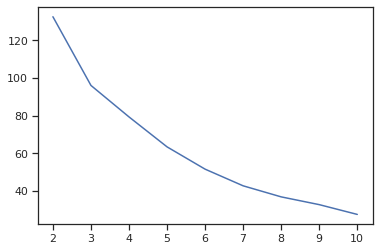

In [32]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# print('{1} and {0}'.format('Geeks', 'Portal')) 
X = StandardScaler()
scaled_df = X.fit_transform(data.iloc[:,0:4])
wss =[] 
# labels are applicable from only n_clusters=2
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    labels = KM.labels_
    wss.append(KM.inertia_)
    print('clusters {} and silhoutte score {}'.format(i, silhouette_score(scaled_df,labels))) 
plt.plot(range(2,11), wss)
plt.show()

In [33]:
KM = KMeans(n_clusters=7)
KM.fit(scaled_df)
labels = KM.labels_
wss.append(KM.inertia_)
sil_width = silhouette_samples(scaled_df,labels)

datac1=data.copy()
datac1["Clus_kmeans4"] = labels
datac1["sil_width"] = sil_width
print(datac1.head())
print(datac1.Clus_kmeans4.value_counts().sort_index())
clust_profile=datac1.iloc[:,0:9].groupby('Clus_kmeans4').mean()
clust_profile['freq']=datac1.Clus_kmeans4.value_counts().sort_index()
print(clust_profile)

   match_day  winner_name  ...  Clus_kmeans4  sil_width
0          1            0  ...             4   0.566993
1          2            0  ...             4   0.509805
2          3            1  ...             5   0.385970
3          4            0  ...             0   0.498548
4          5            0  ...             4   0.521385

[5 rows x 6 columns]
0     5
1    10
2     5
3     8
4    12
5     3
6     7
Name: Clus_kmeans4, dtype: int64
              match_day  winner_name  ...  sil_width  freq
Clus_kmeans4                          ...                 
0             15.200000          0.0  ...   0.481855     5
1             38.200000          0.0  ...   0.315820    10
2             41.600000          1.0  ...   0.573596     5
3             32.500000          1.0  ...   0.354371     8
4             11.500000          0.0  ...   0.449451    12
5             18.000000          1.0  ...   0.314251     3
6             22.428571          1.0  ...   0.329638     7

[7 rows x 6 columns]


   match_day  winner_name  winner_hand  percentage_successful_attempt
0          1            0            1                           40.0
1          2            0            1                           50.0
2          3            1            0                           50.0
3          4            0            0                           20.0
4          5            0            1                           35.0


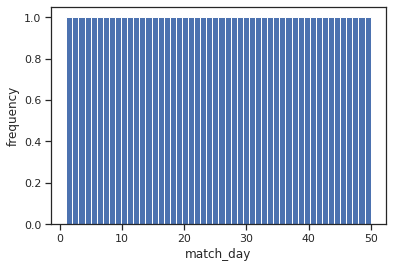

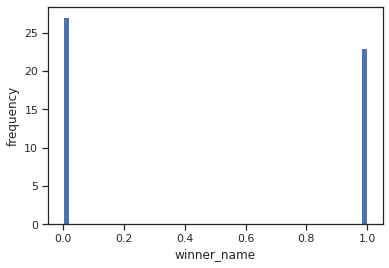

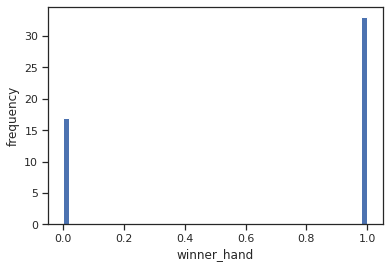

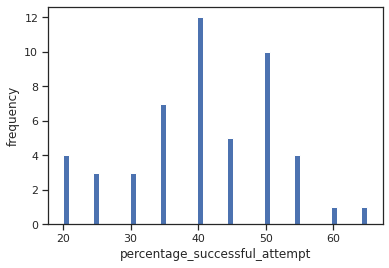

<Figure size 432x288 with 0 Axes>

In [34]:
def histplot(data):
        print(data.head(5))
        colnames=list(data.columns.values)
        for i in range(0,4):
            plt.hist(data.iloc[:,i], bins=50)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.figure()
            plt.savefig('/content/drive/MyDrive/histplot'+str(i)+'.png')
histplot(data)

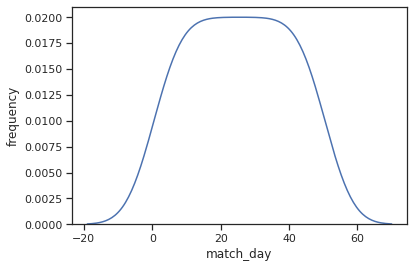

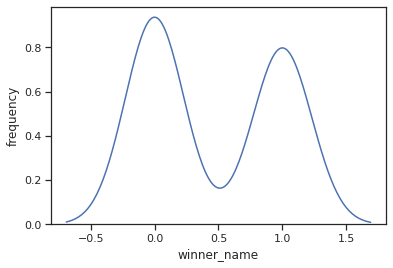

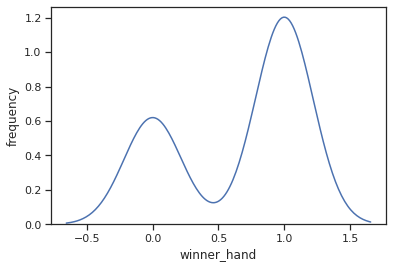

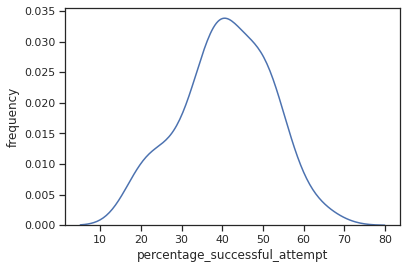

In [35]:
def distplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            sns.distplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
distplot(data)

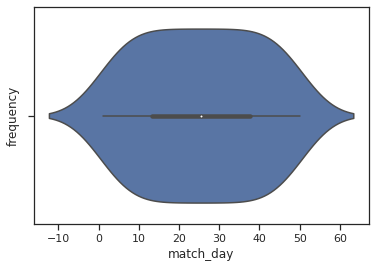

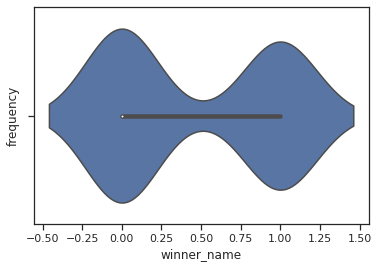

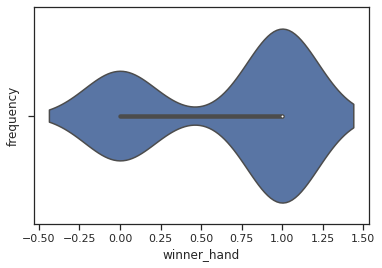

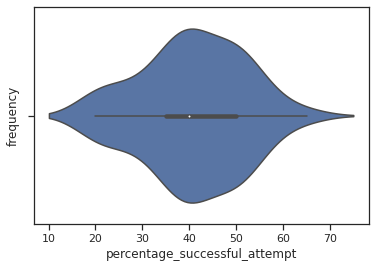

<Figure size 432x288 with 0 Axes>

In [36]:
def violinplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            sns.violinplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.figure()
            plt.savefig('/content/drive/MyDrive/violinplot'+str(i)+'.png')
violinplot(data)

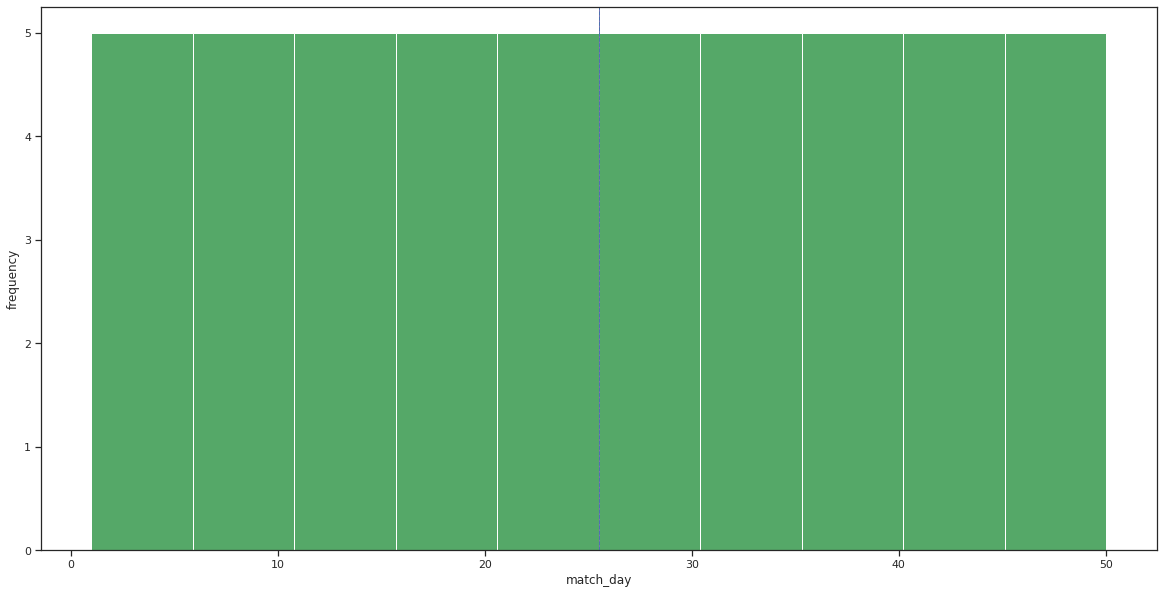

<Figure size 432x288 with 0 Axes>

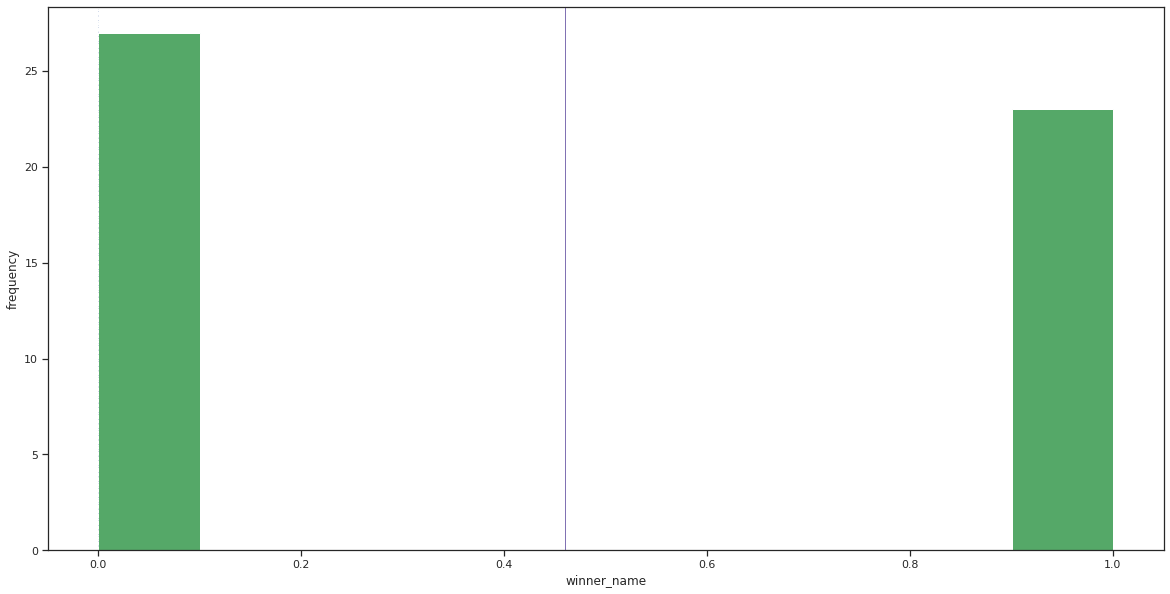

<Figure size 432x288 with 0 Axes>

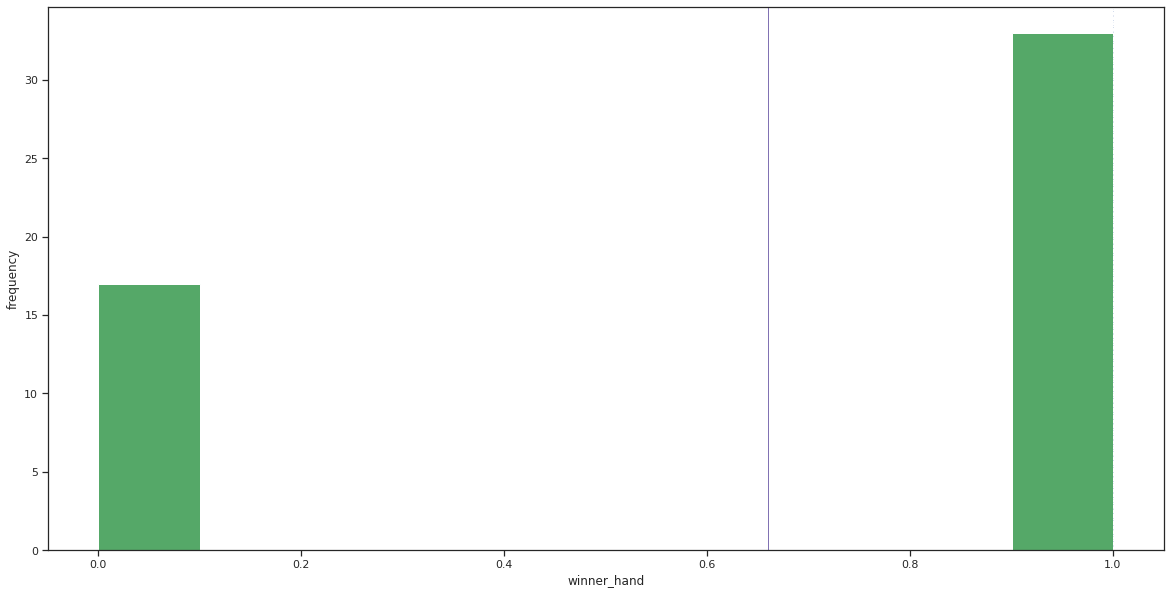

<Figure size 432x288 with 0 Axes>

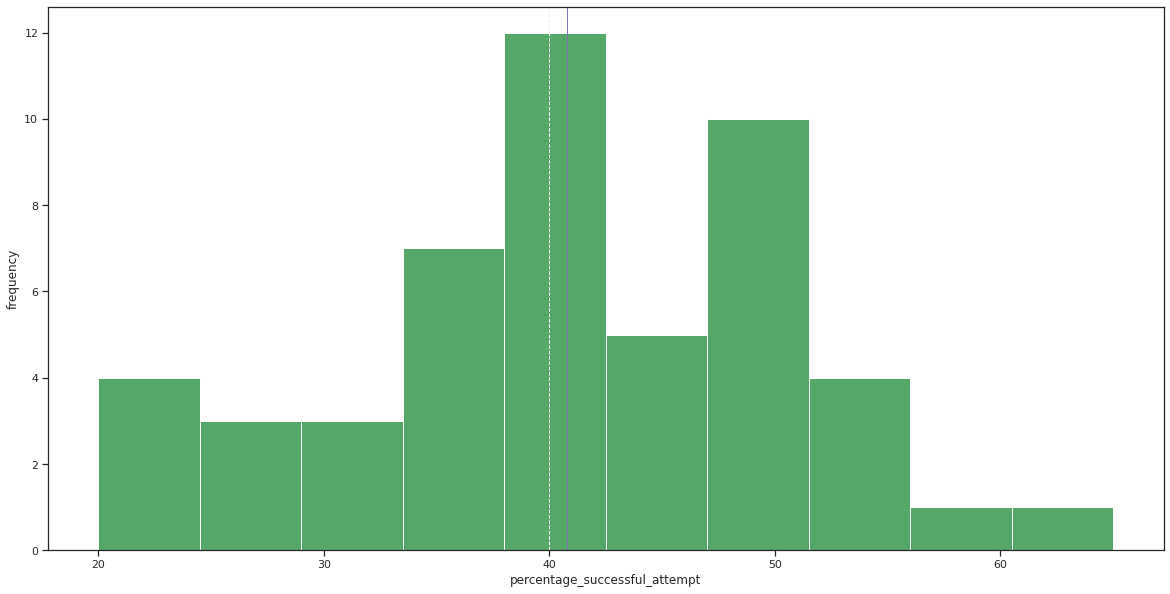

<Figure size 432x288 with 0 Axes>

In [37]:
def closelookplot(data):
        colnames=list(data.columns.values)
        for i in range(0,4):
            plt.figure(figsize=(20,10)) # makes the plot wider
            plt.hist(data.iloc[:,i], color='g') # plots a simple histogram
            plt.axvline(data.iloc[:,i].mean(), color='m', linewidth=1)
            plt.axvline(data.iloc[:,i].median(), color='b', linestyle='dashed', linewidth=1)
            plt.axvline(data.iloc[:,i].mode()[0], color='w', linestyle='dashed', linewidth=1)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.figure()
            plt.savefig('/content/drive/MyDrive/closelookplot'+str(i)+'.png')
closelookplot(data)

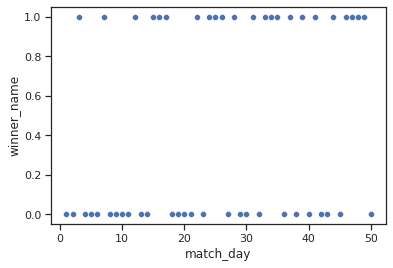

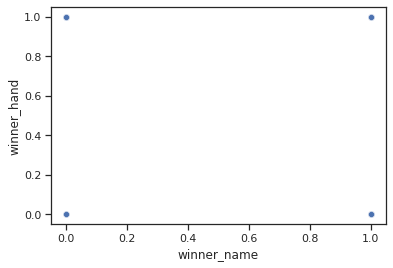

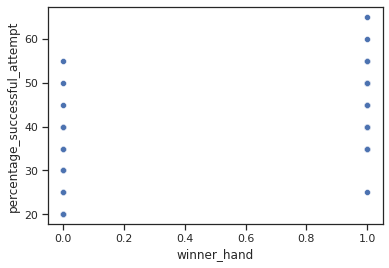

In [38]:
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,3):
            sns.scatterplot(data.iloc[:,i], data.iloc[:,i+1]) 
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
multiscatplot(data)

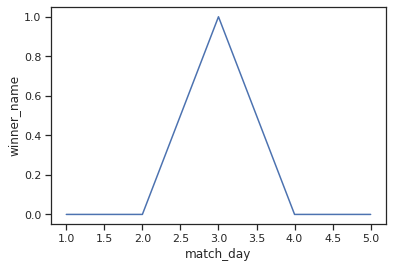

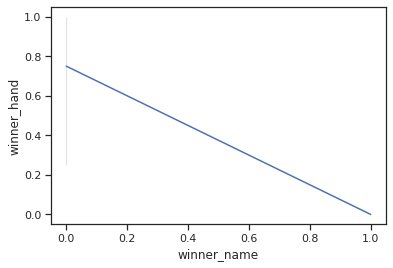

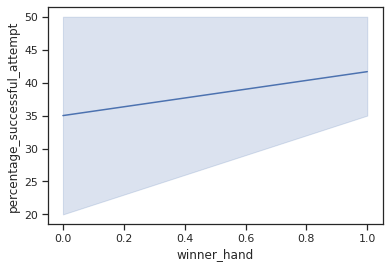

In [39]:
def lineplot(data):
        colnames=list(data.columns.values)
        for i in range(0,3):
            sns.lineplot(x=colnames[i], y=colnames[i+1], data=data.head())
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
lineplot(data)

In [40]:
!pip list | grep pandas

pandas                        1.1.5
pandas-datareader             0.9.0
pandas-gbq                    0.13.3
pandas-profiling              3.0.0
sklearn-pandas                1.8.0


In [41]:
# !pip install pandas_profiling

In [44]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
# df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [45]:
profile = ProfileReport(data)
profile.to_file("/content/drive/MyDrive/output.html")

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
data.to_csv("final.csv")

In [53]:
data.columns

Index(['match_day', 'winner_name', 'winner_hand',
       'percentage_successful_attempt'],
      dtype='object')

(52, 3) (52,)
y train pred head 
           0         1
0  0.734623  0.265377
1  0.233630  0.766370
2  0.247977  0.752023
3  0.251641  0.748359
4  0.711549  0.288451
y test pred head 
           0         1
0  0.734623  0.265377
1  0.233630  0.766370
2  0.247977  0.752023
3  0.251641  0.748359
4  0.711549  0.288451
model cv score [0.667 0.5   0.2   0.6   0.8   0.6   0.8   0.8   0.8   0.6  ]

mean cv score 0.6366666666666666
AUC: 0.781
AUC: 0.750
[[17  9]
 [10 16]]
0.6346153846153846
              precision    recall  f1-score   support

           0       0.63      0.65      0.64        26
           1       0.64      0.62      0.63        26

    accuracy                           0.63        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.63      0.63      0.63        52

logit_train_precision  0.62
logit_train_recall  0.63
logit_train_f1  0.64
[[0 1]
 [0 4]]
0.8
              precision    recall  f1-score   support

           0       0.00      0.00    

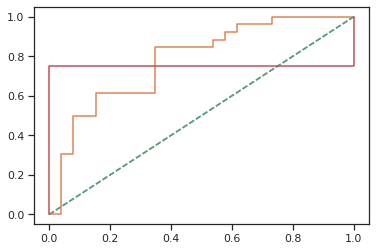

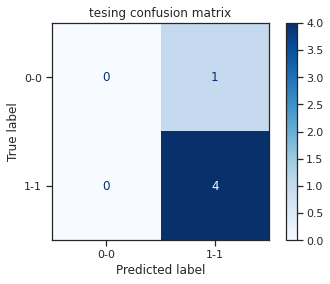

Confusion matrix, without normalization training set
[[17  9]
 [10 16]]


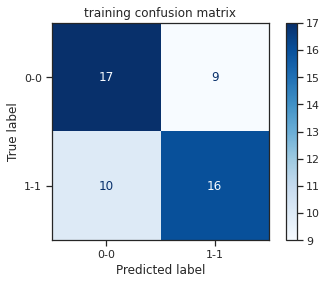

Normalized confusion matrix testing set
[[0. 1.]
 [0. 1.]]


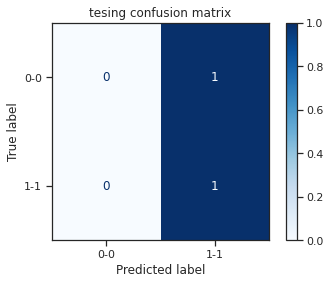

Normalized confusion matrix training set
[[0.654 0.346]
 [0.385 0.615]]


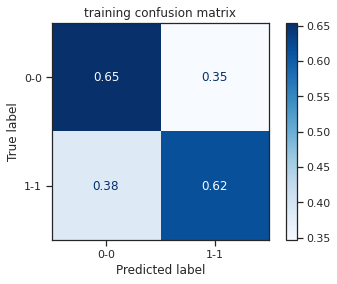

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
x = data.drop(columns=["winner_name"])
y = data["winner_name"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

sm = SMOTE(random_state=3)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
print(x_train_res.shape,y_train_res.shape)

model = LogisticRegression()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train_res, y_train_res, cv=10)
print("model cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr)

print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
logit_train_acc=model.score(x_train_res,y_train_res) 
print(logit_train_acc)
print(classification_report(y_train_res, ytrain_predict))
logit_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_precision=round(df.loc["1"][1],2)
logit_train_recall=round(df.loc["1"][2],2)
logit_train_f1=round(df.loc["1"][0],2)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
logit_test_acc=model.score(x_test,y_test)
print(logit_test_acc)
print(classification_report(y_test, ytest_predict))
logit_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_precision=round(df.loc["1"][1],2)
logit_test_recall=round(df.loc["1"][2],2)
logit_test_f1=round(df.loc["1"][0],2)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

def plotconftmat(class_names, y_test, model):
    np.set_printoptions(precision=3)
    class_names = ["0-0", "1-1"] # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        test_disp = plot_confusion_matrix(model, x_test, y_test, 
            display_labels=class_names, 
            cmap=plt.cm.Blues, 
            normalize=normalize)
        test_disp.ax_.set_title(title)
        print(title + " testing set")
        print(test_disp.confusion_matrix)
        plt.title("tesing confusion matrix")
        plt.show()
        train_disp = plot_confusion_matrix(model, x_train_res, y_train_res, 
            display_labels=class_names, 
            cmap=plt.cm.Blues, 
            normalize=normalize)
        train_disp.ax_.set_title(title)
        print(title + " training set")
        print(train_disp.confusion_matrix)
        plt.title("training confusion matrix")
        plt.show()
        
plotconftmat(["0","1"], y_test, model)

In [62]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 26, 1: 19})
Resampled dataset shape Counter({0: 26, 1: 26})


y train pred head 
           0         1
0  0.531565  0.468435
1  0.067257  0.932743
2  0.289697  0.710303
3  0.069887  0.930113
4  0.450900  0.549100
y test pred head 
           0         1
0  0.531565  0.468435
1  0.067257  0.932743
2  0.289697  0.710303
3  0.069887  0.930113
4  0.450900  0.549100
model cv score [0.333 0.667 0.2   0.6   0.8   0.6   0.6   0.8   0.8   0.6  ]

mean cv score 0.5999999999999999
[[0 1]
 [1 3]]
0.6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5

NaiveBayes_test_precision  0.75
NaiveBayes_test_recall  0.75
NaiveBayes_test_f1  0.75
AUC: 0.763
AUC: 0.750
[[18  8]
 [ 9 17]]
0.6730769230769231
              precision    recall  f1-score   support

           0       0.67      0.69      

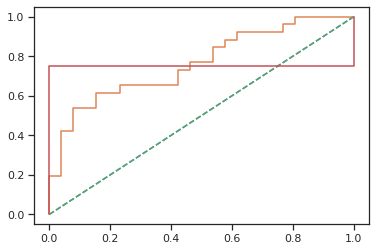

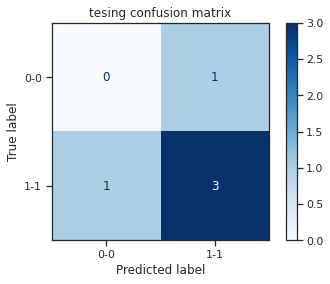

Confusion matrix, without normalization training set
[[18  8]
 [ 9 17]]


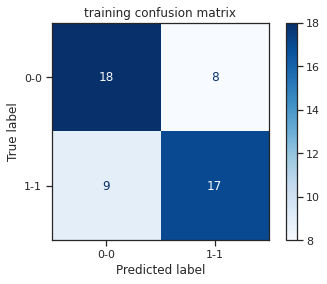

Normalized confusion matrix testing set
[[0.   1.  ]
 [0.25 0.75]]


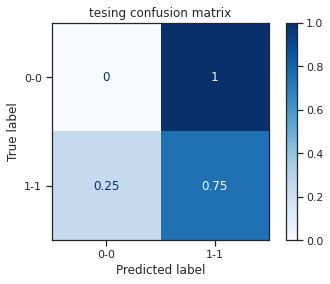

Normalized confusion matrix training set
[[0.692 0.308]
 [0.346 0.654]]


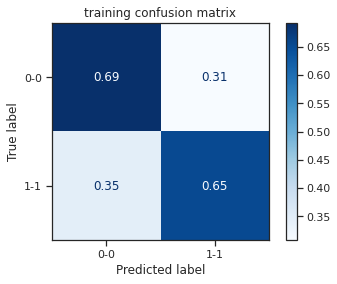

In [63]:
model = GaussianNB()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train_res, y_train_res, cv=10)
print("model cv score {}\n".format(scores))
print("mean cv score",scores.mean())

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
NaiveBayes_test_acc=model.score(x_test,y_test)
print(NaiveBayes_test_acc)
print(classification_report(y_test, ytest_predict))
NaiveBayes_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(NaiveBayes_metrics).transpose()
NaiveBayes_test_precision=round(df.loc["1"][1],2)
NaiveBayes_test_recall=round(df.loc["1"][2],2)
NaiveBayes_test_f1=round(df.loc["1"][0],2)
print ('NaiveBayes_test_precision ',NaiveBayes_test_precision)
print ('NaiveBayes_test_recall ',NaiveBayes_test_recall)
print ('NaiveBayes_test_f1 ',NaiveBayes_test_f1)

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NaiveBayes_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % NaiveBayes_train_auc)
# calculate roc curve
NaiveBayes_train_fpr, NaiveBayes_train_tpr, NaiveBayes_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NaiveBayes_train_fpr, NaiveBayes_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NaiveBayes_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NaiveBayes_test_auc)
# calculate roc curve
NaiveBayes_test_fpr, NaiveBayes_test_tpr, NaiveBayes_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NaiveBayes_test_fpr, NaiveBayes_test_tpr)

print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
NaiveBayes_train_acc=model.score(x_train_res,y_train_res) 
print(NaiveBayes_train_acc)
print(classification_report(y_train_res, ytrain_predict))
NaiveBayes_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(NaiveBayes_metrics).transpose()
NaiveBayes_train_precision=round(df.loc["1"][1],2)
NaiveBayes_train_recall=round(df.loc["1"][2],2)
NaiveBayes_train_f1=round(df.loc["1"][0],2)
print ('NaiveBayes_train_precision ',NaiveBayes_train_precision)
print ('NaiveBayes_train_recall ',NaiveBayes_train_recall)
print ('NaiveBayes_train_f1 ',NaiveBayes_train_f1)
plotconftmat(["0","1"], y_test, model)

y train pred head 
      0    1
0  1.0  0.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
y test pred head 
      0    1
0  1.0  0.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
model cv score [0.833 0.833 0.4   0.4   0.6   0.6   0.8   0.6   0.6   0.4  ]

mean cv score 0.6066666666666667
AUC: 1.000
AUC: 0.250
[[26  0]
 [ 0 26]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        26

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

DecisionTree_train_precision  1.0
DecisionTree_train_recall  1.0
DecisionTree_train_f1  1.0
[[0 1]
 [2 2]]
0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.50      0.57         4

    accuracy                           0.40         5
   ma

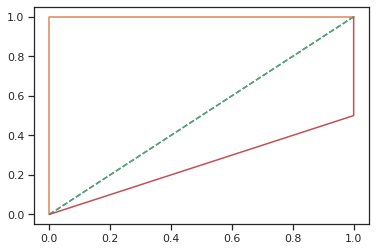

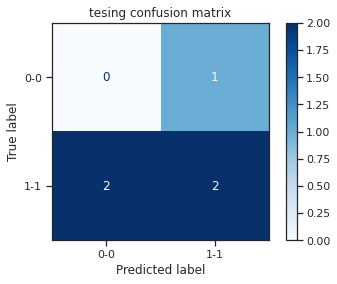

Confusion matrix, without normalization training set
[[26  0]
 [ 0 26]]


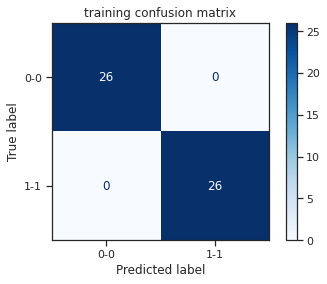

Normalized confusion matrix testing set
[[0.  1. ]
 [0.5 0.5]]


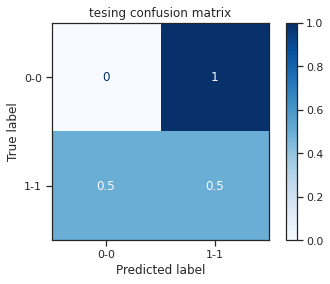

Normalized confusion matrix training set
[[1. 0.]
 [0. 1.]]


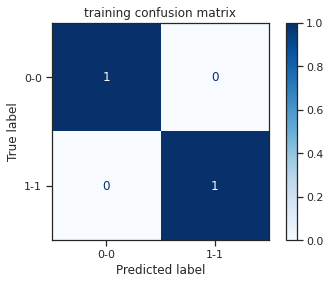

In [64]:
model = tree.DecisionTreeClassifier()
model.fit(x_train_res, y_train_res)


ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train_res, y_train_res, cv=10)
print("model cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DecisionTree_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % DecisionTree_train_auc)
# calculate roc curve
DecisionTree_train_fpr, DecisionTree_train_tpr, DecisionTree_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DecisionTree_train_fpr, DecisionTree_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DecisionTree_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DecisionTree_test_auc)
# calculate roc curve
DecisionTree_test_fpr, DecisionTree_test_tpr, DecisionTree_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DecisionTree_test_fpr, DecisionTree_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
DecisionTree_train_acc=model.score(x_train_res,y_train_res) 
print(DecisionTree_train_acc)
print(classification_report(y_train_res, ytrain_predict))
DecisionTree_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(DecisionTree_metrics).transpose()
DecisionTree_train_precision=round(df.loc["1"][1],2)
DecisionTree_train_recall=round(df.loc["1"][2],2)
DecisionTree_train_f1=round(df.loc["1"][0],2)
print ('DecisionTree_train_precision ',DecisionTree_train_precision)
print ('DecisionTree_train_recall ',DecisionTree_train_recall)
print ('DecisionTree_train_f1 ',DecisionTree_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
DecisionTree_test_acc=model.score(x_test,y_test)
print(DecisionTree_test_acc)
print(classification_report(y_test, ytest_predict))
DecisionTree_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(DecisionTree_metrics).transpose()
DecisionTree_test_precision=round(df.loc["1"][1],2)
DecisionTree_test_recall=round(df.loc["1"][2],2)
DecisionTree_test_f1=round(df.loc["1"][0],2)
print ('DecisionTree_test_precision ',DecisionTree_test_precision)
print ('DecisionTree_test_recall ',DecisionTree_test_recall)
print ('DecisionTree_test_f1 ',DecisionTree_test_f1)
plotconftmat(["0","1"], y_test, model)

grid search
 GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
           

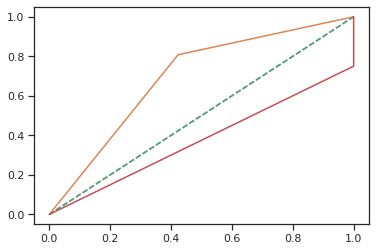

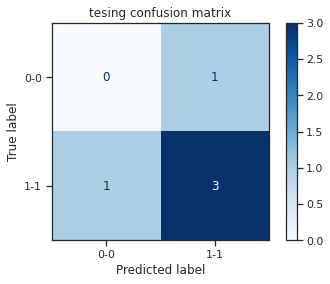

Confusion matrix, without normalization training set
[[15 11]
 [ 5 21]]


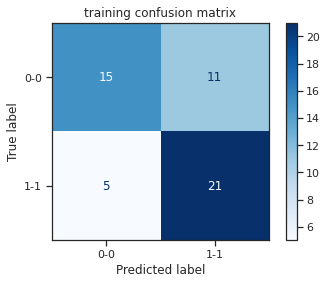

Normalized confusion matrix testing set
[[0.   1.  ]
 [0.25 0.75]]


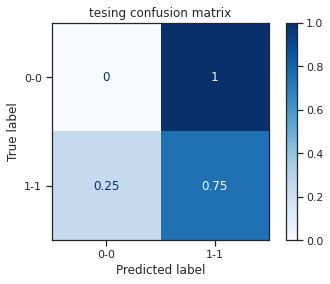

Normalized confusion matrix training set
[[0.577 0.423]
 [0.192 0.808]]


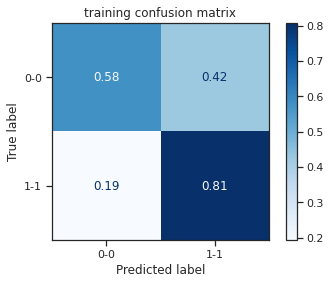

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {
'max_depth': [7, 8, 9, 10],
'min_samples_leaf': [15, 20, 25],
'min_samples_split': [45, 60, 75]
}
reg_dt_model = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 10)
print("grid search\n",grid_search)
grid_search.fit(x_train_res, y_train_res)
print("grid search fit\n",grid_search.fit(x_train_res, y_train_res))
print("grid search best params\n",grid_search.best_params_)
best_grid = grid_search.best_estimator_
print("best grid\n",best_grid)
# ytrain_predict = best_grid.predict(x_train_res)
# ytest_predict = best_grid.predict(x_test)

ytrain_predict = best_grid.predict(x_train_res)
ytest_predict = best_grid.predict(x_test)
ytrain_predict_prob=best_grid.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=best_grid.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = best_grid.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DecisionTree_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % DecisionTree_train_auc)
# calculate roc curve
DecisionTree_train_fpr, DecisionTree_train_tpr, DecisionTree_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid
plt.plot(DecisionTree_train_fpr, DecisionTree_train_tpr)

# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DecisionTree_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DecisionTree_test_auc)
# calculate roc curve
DecisionTree_test_fpr, DecisionTree_test_tpr, DecisionTree_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid
plt.plot(DecisionTree_test_fpr, DecisionTree_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
DecisionTree_train_acc=best_grid.score(x_train_res,y_train_res) 
print(DecisionTree_train_acc)
print(classification_report(y_train_res, ytrain_predict))
DecisionTree_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(DecisionTree_metrics).transpose()
DecisionTree_train_precision=round(df.loc["1"][1],2)
DecisionTree_train_recall=round(df.loc["1"][2],2)
DecisionTree_train_f1=round(df.loc["1"][0],2)
print ('DecisionTree_train_precision ',DecisionTree_train_precision)
print ('DecisionTree_train_recall ',DecisionTree_train_recall)
print ('DecisionTree_train_f1 ',DecisionTree_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
DecisionTree_test_acc=best_grid.score(x_test,y_test)
print(DecisionTree_test_acc)
print(classification_report(y_test, ytest_predict))
DecisionTree_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(DecisionTree_metrics).transpose()
DecisionTree_test_precision=round(df.loc["1"][1],2)
DecisionTree_test_recall=round(df.loc["1"][2],2)
DecisionTree_test_f1=round(df.loc["1"][0],2)
print ('DecisionTree_test_precision ',DecisionTree_test_precision)
print ('DecisionTree_test_recall ',DecisionTree_test_recall)
print ('DecisionTree_test_f1 ',DecisionTree_test_f1)
plotconftmat(["0","1"], y_test, best_grid)

In [66]:
print(grid_search.best_params_['max_depth'])

7


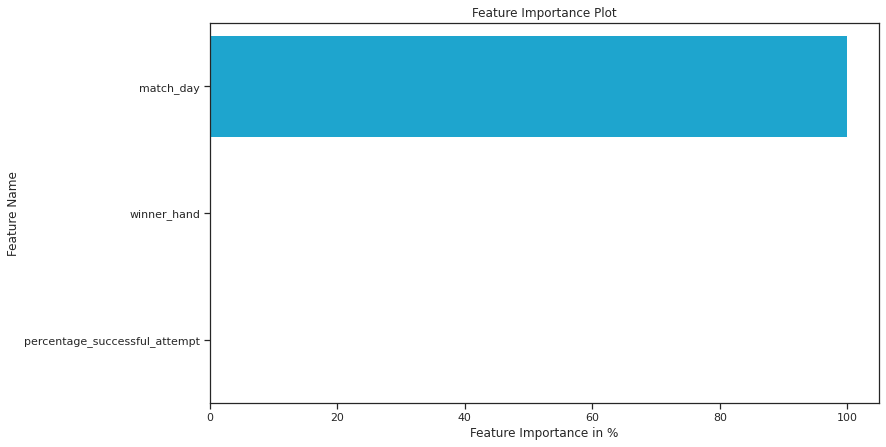

In [67]:
reg_dt_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = grid_search.best_params_['max_depth'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'])
reg_dt_model.fit(x_train_res, y_train_res)

x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=x.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

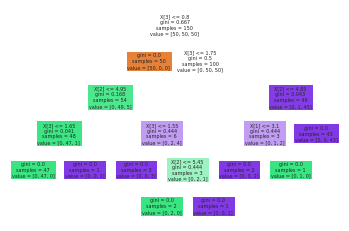

In [68]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
# tree.plot_tree(clf)  # doctest: +SKIP

tree.plot_tree(clf, filled=True)
plt.show()

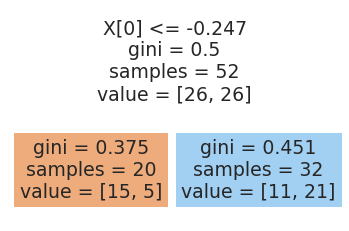

In [69]:
reg_dt_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = grid_search.best_params_['max_depth'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'])
fit=reg_dt_model.fit(x_train_res, y_train_res)
tree.plot_tree(fit, filled=True)
plt.show()

y train pred head 
       0     1
0  0.83  0.17
1  0.02  0.98
2  0.62  0.38
3  0.01  0.99
4  0.72  0.28
y test pred head 
       0     1
0  0.83  0.17
1  0.02  0.98
2  0.62  0.38
3  0.01  0.99
4  0.72  0.28
model cv score [0.667 0.833 0.2   0.4   0.6   0.2   0.8   0.6   0.6   1.   ]

mean cv score 0.5900000000000001
AUC: 1.000
AUC: 0.750
[[26  0]
 [ 0 26]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        26

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

RandomForest_train_precision  1.0
RandomForest_train_recall  1.0
RandomForest_train_f1  1.0
[[0 1]
 [1 3]]
0.6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                       

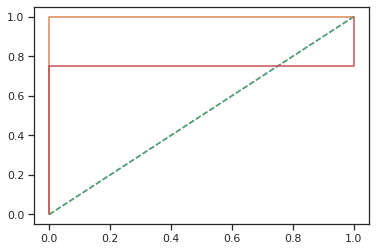

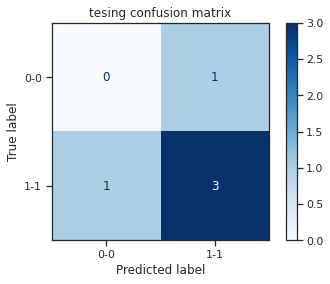

Confusion matrix, without normalization training set
[[26  0]
 [ 0 26]]


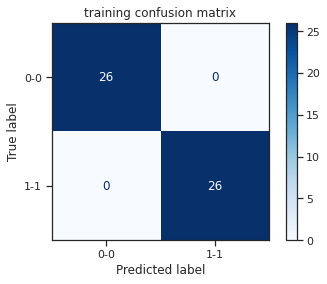

Normalized confusion matrix testing set
[[0.   1.  ]
 [0.25 0.75]]


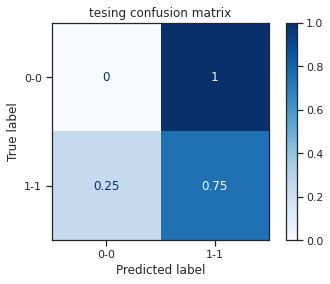

Normalized confusion matrix training set
[[1. 0.]
 [0. 1.]]


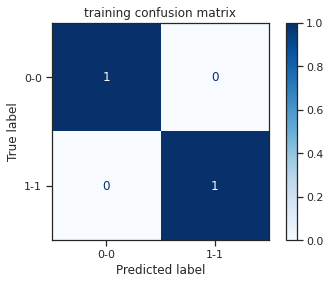

In [71]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(model, x_train_res, y_train_res, cv=10)
print("model cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
RandomForest_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % RandomForest_train_auc)
# calculate roc curve
RandomForest_train_fpr, RandomForest_train_tpr, RandomForest_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RandomForest_train_fpr, RandomForest_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RandomForest_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RandomForest_test_auc)
# calculate roc curve
RandomForest_test_fpr, RandomForest_test_tpr, RandomForest_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RandomForest_test_fpr, RandomForest_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
RandomForest_train_acc=model.score(x_train_res,y_train_res) 
print(RandomForest_train_acc)
print(classification_report(y_train_res, ytrain_predict))
RandomForest_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(RandomForest_metrics).transpose()
RandomForest_train_precision=round(df.loc["1"][1],2)
RandomForest_train_recall=round(df.loc["1"][2],2)
RandomForest_train_f1=round(df.loc["1"][0],2)
print ('RandomForest_train_precision ',RandomForest_train_precision)
print ('RandomForest_train_recall ',RandomForest_train_recall)
print ('RandomForest_train_f1 ',RandomForest_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
RandomForest_test_acc=model.score(x_test,y_test)
print(RandomForest_test_acc)
print(classification_report(y_test, ytest_predict))
RandomForest_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(RandomForest_metrics).transpose()
RandomForest_test_precision=round(df.loc["1"][1],2)
RandomForest_test_recall=round(df.loc["1"][2],2)
RandomForest_test_f1=round(df.loc["1"][0],2)
print ('RandomForest_test_precision ',RandomForest_test_precision)
print ('RandomForest_test_recall ',RandomForest_test_recall)
print ('RandomForest_test_f1 ',RandomForest_test_f1)
plotconftmat(["0","1"], y_test, model)

grid search
 GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                     

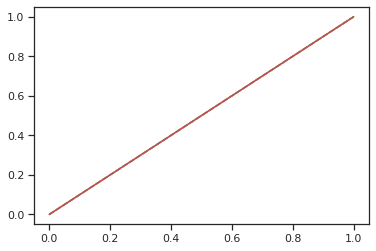

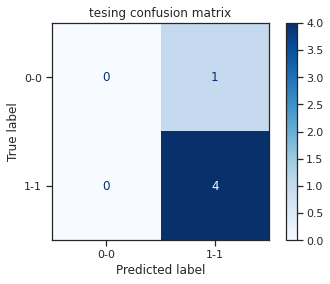

Confusion matrix, without normalization training set
[[ 0 26]
 [ 0 26]]


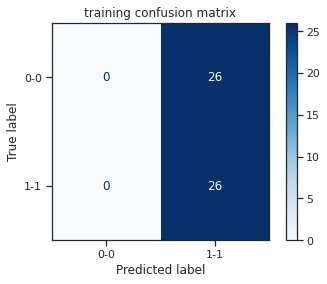

Normalized confusion matrix testing set
[[0. 1.]
 [0. 1.]]


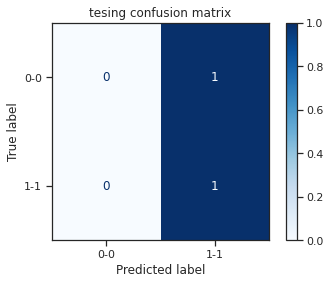

Normalized confusion matrix training set
[[0. 1.]
 [0. 1.]]


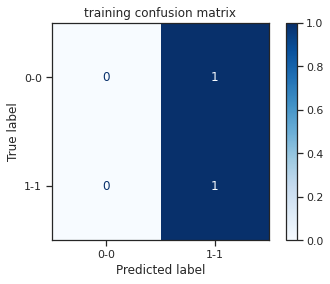

In [73]:
# model = RandomForestClassifier(n_estimators=100)
# model.fit(x_train_res, y_train_res)
# ytrain_predict = model.predict(x_train_res)
# ytest_predict = model.predict(x_test)

param_grid = {
        'max_depth': [5,7],
        'max_features': [2,4],
        'min_samples_leaf': [5,10],
        'min_samples_split': [50,100],
        'n_estimators': [50,100]
            }
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10)
print("grid search\n",grid_search)
grid_search.fit(x_train_res, y_train_res)
print("grid search fit\n",grid_search.fit(x_train_res, y_train_res))
print("grid search best params\n",grid_search.best_params_)
best_grid = grid_search.best_estimator_
print("best grid\n",best_grid)
ytrain_predict = best_grid.predict(x_train_res)
ytest_predict = best_grid.predict(x_test)

ytrain_predict_prob=best_grid.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=best_grid.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = best_grid.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
RandomForest_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % RandomForest_train_auc)
# calculate roc curve
RandomForest_train_fpr, RandomForest_train_tpr, RandomForest_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid
plt.plot(RandomForest_train_fpr, RandomForest_train_tpr)

# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RandomForest_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RandomForest_test_auc)
# calculate roc curve
RandomForest_test_fpr, RandomForest_test_tpr, RandomForest_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid
plt.plot(RandomForest_test_fpr, RandomForest_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
RandomForest_train_acc=best_grid.score(x_train_res,y_train_res) 
print(RandomForest_train_acc)
print(classification_report(y_train_res, ytrain_predict))
RandomForest_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(RandomForest_metrics).transpose()
RandomForest_train_precision=round(df.loc["1"][1],2)
RandomForest_train_recall=round(df.loc["1"][2],2)
RandomForest_train_f1=round(df.loc["1"][0],2)
print ('RandomForest_train_precision ',RandomForest_train_precision)
print ('RandomForest_train_recall ',RandomForest_train_recall)
print ('RandomForest_train_f1 ',RandomForest_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
RandomForest_test_acc=best_grid.score(x_test,y_test)
print(RandomForest_test_acc)
print(classification_report(y_test, ytest_predict))
RandomForest_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(RandomForest_metrics).transpose()
RandomForest_test_precision=round(df.loc["1"][1],2)
RandomForest_test_recall=round(df.loc["1"][2],2)
RandomForest_test_f1=round(df.loc["1"][0],2)
print ('RandomForest_test_precision ',RandomForest_test_precision)
print ('RandomForest_test_recall ',RandomForest_test_recall)
print ('RandomForest_test_f1 ',RandomForest_test_f1)
plotconftmat(["0","1"], y_test, best_grid)

y train pred head 
           0         1
0  0.643139  0.356861
1  0.306676  0.693324
2  0.305035  0.694965
3  0.295851  0.704149
4  0.643172  0.356828
y test pred head 
           0         1
0  0.643139  0.356861
1  0.306676  0.693324
2  0.305035  0.694965
3  0.295851  0.704149
4  0.643172  0.356828
best_grid cv score [0.5 0.5 0.6 0.6 0.4 0.6 0.4 0.4 0.4 0.4]

mean cv score 0.4800000000000001
AUC: 0.822
AUC: 0.750
[[21  5]
 [ 8 18]]
0.75
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.78      0.69      0.73        26

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52

SVM_train_precision  0.69
SVM_train_recall  0.73
SVM_train_f1  0.78
[[0 1]
 [0 4]]
0.8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      1.00

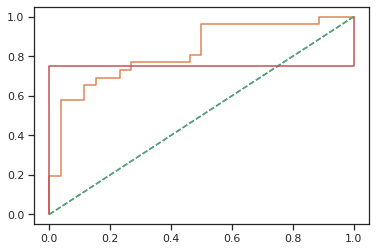

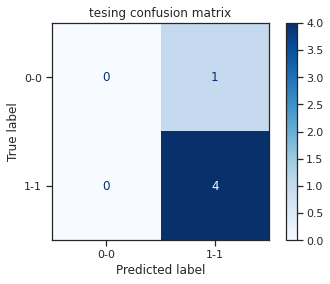

Confusion matrix, without normalization training set
[[21  5]
 [ 8 18]]


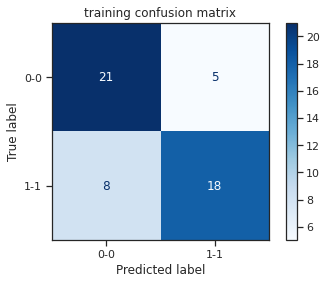

Normalized confusion matrix testing set
[[0. 1.]
 [0. 1.]]


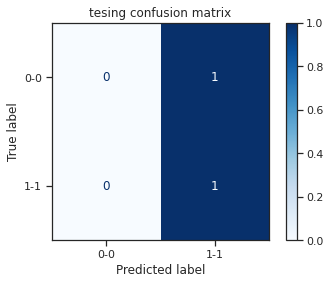

Normalized confusion matrix training set
[[0.808 0.192]
 [0.308 0.692]]


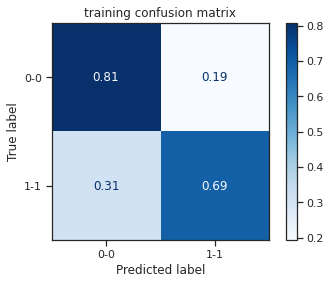

In [74]:
model = svm.SVC(probability=True)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
SVM_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % SVM_train_auc)
# calculate roc curve
SVM_train_fpr, SVM_train_tpr, SVM_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_train_fpr, SVM_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % SVM_test_auc)
# calculate roc curve
SVM_test_fpr, SVM_test_tpr, SVM_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_test_fpr, SVM_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
SVM_train_acc=model.score(x_train_res,y_train_res) 
print(SVM_train_acc)
print(classification_report(y_train_res, ytrain_predict))
SVM_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_train_precision=round(df.loc["1"][1],2)
SVM_train_recall=round(df.loc["1"][2],2)
SVM_train_f1=round(df.loc["1"][0],2)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
SVM_test_acc=model.score(x_test,y_test)
print(SVM_test_acc)
print(classification_report(y_test, ytest_predict))
SVM_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(SVM_metrics).transpose()
SVM_test_precision=round(df.loc["1"][1],2)
SVM_test_recall=round(df.loc["1"][2],2)
SVM_test_f1=round(df.loc["1"][0],2)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)
plotconftmat(["0","1"], y_test, model)

y train pred head 
           0         1
0  0.771469  0.228531
1  0.208970  0.791030
2  0.207939  0.792061
3  0.228304  0.771696
4  0.761074  0.238926
y test pred head 
           0         1
0  0.771469  0.228531
1  0.208970  0.791030
2  0.207939  0.792061
3  0.228304  0.771696
4  0.761074  0.238926
best_grid cv score [0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]

mean cv score 0.42000000000000004
AUC: 0.777
AUC: 0.500
[[17  9]
 [10 16]]
0.6346153846153846
              precision    recall  f1-score   support

           0       0.63      0.65      0.64        26
           1       0.64      0.62      0.63        26

    accuracy                           0.63        52
   macro avg       0.63      0.63      0.63        52
weighted avg       0.63      0.63      0.63        52

LDA_train_precision  0.62
LDA_train_recall  0.63
LDA_train_f1  0.64
[[0 1]
 [0 4]]
0.8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1      

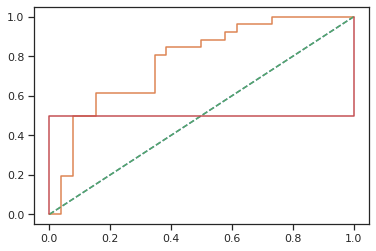

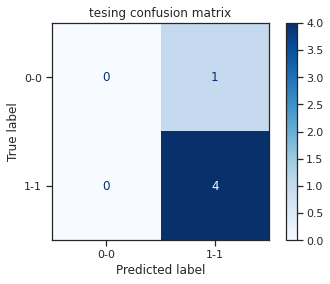

Confusion matrix, without normalization training set
[[17  9]
 [10 16]]


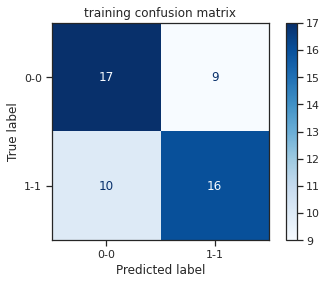

Normalized confusion matrix testing set
[[0. 1.]
 [0. 1.]]


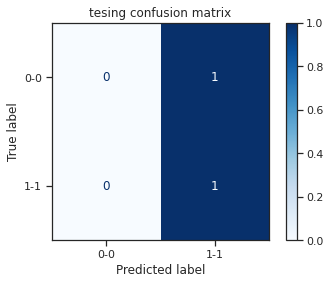

Normalized confusion matrix training set
[[0.654 0.346]
 [0.385 0.615]]


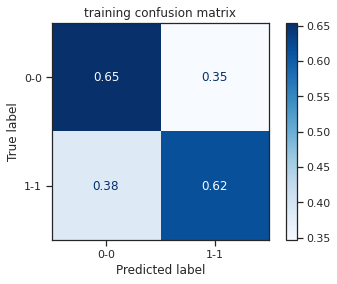

In [75]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
LDA_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
LDA_train_acc=model.score(x_train_res,y_train_res) 
print(LDA_train_acc)
print(classification_report(y_train_res, ytrain_predict))
LDA_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][1],2)
LDA_train_recall=round(df.loc["1"][2],2)
LDA_train_f1=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
LDA_test_acc=model.score(x_test,y_test)
print(LDA_test_acc)
print(classification_report(y_test, ytest_predict))
LDA_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][1],2)
LDA_test_recall=round(df.loc["1"][2],2)
LDA_test_f1=round(df.loc["1"][0],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)
plotconftmat(["0","1"], y_test, model)

y train pred head 
           0         1
0  0.530727  0.469273
1  0.433595  0.566405
2  0.515521  0.484479
3  0.433595  0.566405
4  0.518173  0.481827
y test pred head 
           0         1
0  0.530727  0.469273
1  0.433595  0.566405
2  0.515521  0.484479
3  0.433595  0.566405
4  0.518173  0.481827
best_grid cv score [0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]

mean cv score 0.42000000000000004
AUC: 1.000
AUC: 0.250
[[26  0]
 [ 0 26]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        26

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

AdaBoost_train_precision  1.0
AdaBoost_train_recall  1.0
AdaBoost_train_f1  1.0
[[0 1]
 [2 2]]
0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.

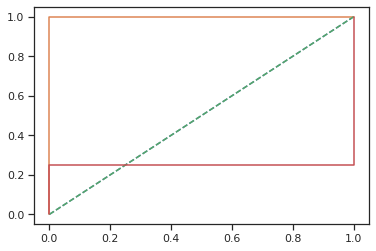

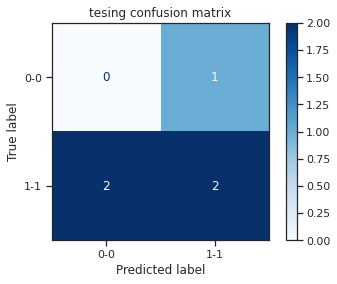

Confusion matrix, without normalization training set
[[26  0]
 [ 0 26]]


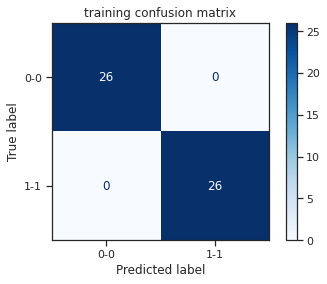

Normalized confusion matrix testing set
[[0.  1. ]
 [0.5 0.5]]


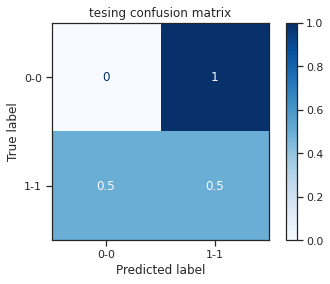

Normalized confusion matrix training set
[[1. 0.]
 [0. 1.]]


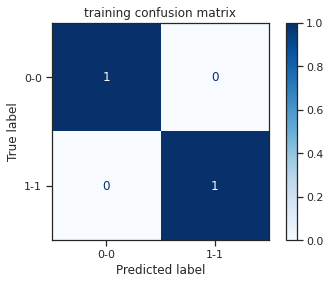

In [76]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
AdaBoost_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % AdaBoost_train_auc)
# calculate roc curve
AdaBoost_train_fpr, AdaBoost_train_tpr, AdaBoost_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AdaBoost_train_fpr, AdaBoost_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
AdaBoost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % AdaBoost_test_auc)
# calculate roc curve
AdaBoost_test_fpr, AdaBoost_test_tpr, AdaBoost_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(AdaBoost_test_fpr, AdaBoost_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
AdaBoost_train_acc=model.score(x_train_res,y_train_res) 
print(AdaBoost_train_acc)
print(classification_report(y_train_res, ytrain_predict))
AdaBoost_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(AdaBoost_metrics).transpose()
AdaBoost_train_precision=round(df.loc["1"][1],2)
AdaBoost_train_recall=round(df.loc["1"][2],2)
AdaBoost_train_f1=round(df.loc["1"][0],2)
print ('AdaBoost_train_precision ',AdaBoost_train_precision)
print ('AdaBoost_train_recall ',AdaBoost_train_recall)
print ('AdaBoost_train_f1 ',AdaBoost_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
AdaBoost_test_acc=model.score(x_test,y_test)
print(AdaBoost_test_acc)
print(classification_report(y_test, ytest_predict))
AdaBoost_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(AdaBoost_metrics).transpose()
AdaBoost_test_precision=round(df.loc["1"][1],2)
AdaBoost_test_recall=round(df.loc["1"][2],2)
AdaBoost_test_f1=round(df.loc["1"][0],2)
print ('AdaBoost_test_precision ',AdaBoost_test_precision)
print ('AdaBoost_test_recall ',AdaBoost_test_recall)
print ('AdaBoost_test_f1 ',AdaBoost_test_f1)
plotconftmat(["0","1"], y_test, model)

y train pred head 
      0    1
0  0.6  0.4
1  0.0  1.0
2  0.4  0.6
3  0.0  1.0
4  0.6  0.4
y test pred head 
      0    1
0  0.6  0.4
1  0.0  1.0
2  0.4  0.6
3  0.0  1.0
4  0.6  0.4
best_grid cv score [0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]

mean cv score 0.42000000000000004
AUC: 0.848
AUC: 0.875
[[19  7]
 [ 4 22]]
0.7884615384615384
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.76      0.85      0.80        26

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52

KNN_train_precision  0.85
KNN_train_recall  0.8
KNN_train_f1  0.76
[[1 0]
 [1 3]]
0.8
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0

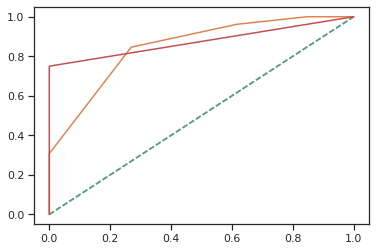

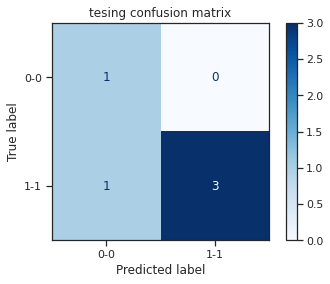

Confusion matrix, without normalization training set
[[19  7]
 [ 4 22]]


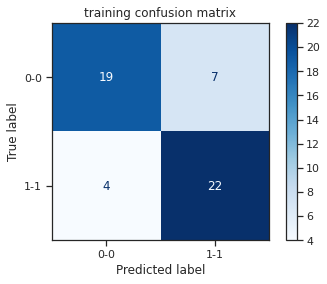

Normalized confusion matrix testing set
[[1.   0.  ]
 [0.25 0.75]]


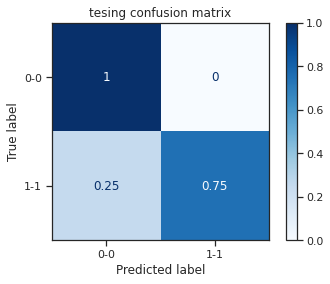

Normalized confusion matrix training set
[[0.731 0.269]
 [0.154 0.846]]


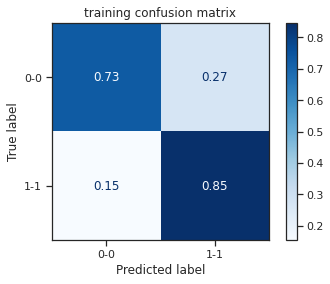

In [78]:
model = KNeighborsClassifier()
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
KNN_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
KNN_train_acc=model.score(x_train_res,y_train_res) 
print(KNN_train_acc)
print(classification_report(y_train_res, ytrain_predict))
KNN_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df.loc["1"][1],2)
KNN_train_recall=round(df.loc["1"][2],2)
KNN_train_f1=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
KNN_test_acc=model.score(x_test,y_test)
print(KNN_test_acc)
print(classification_report(y_test, ytest_predict))
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][1],2)
KNN_test_recall=round(df.loc["1"][2],2)
KNN_test_f1=round(df.loc["1"][0],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)
plotconftmat(["0","1"], y_test, model)

y train pred head 
           0         1
0  0.676544  0.323456
1  0.296064  0.703936
2  0.464169  0.535831
3  0.296064  0.703936
4  0.507222  0.492778
y test pred head 
           0         1
0  0.676544  0.323456
1  0.296064  0.703936
2  0.464169  0.535831
3  0.296064  0.703936
4  0.507222  0.492778
best_grid cv score [0.5 0.5 0.6 0.4 0.4 0.4 0.6 0.4 0.4 0.4]

mean cv score 0.4600000000000001
AUC: 0.923
AUC: 0.750
[[24  2]
 [ 8 18]]
0.8076923076923077
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.90      0.69      0.78        26

    accuracy                           0.81        52
   macro avg       0.82      0.81      0.81        52
weighted avg       0.83      0.81      0.81        52

XGBoost_train_precision  0.69
XGBoost_train_recall  0.78
XGBoost_train_f1  0.9
[[0 1]
 [1 3]]
0.6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
        

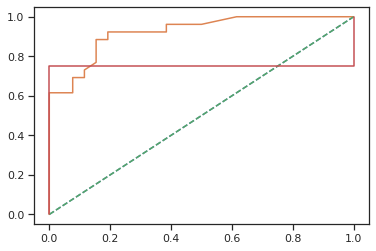

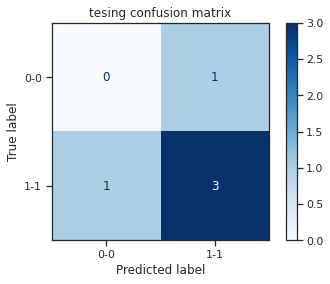

Confusion matrix, without normalization training set
[[24  2]
 [ 8 18]]


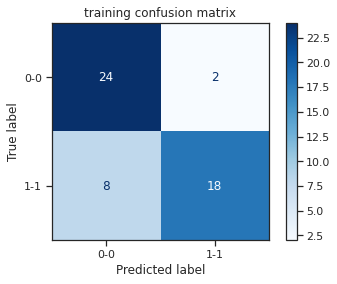

Normalized confusion matrix testing set
[[0.   1.  ]
 [0.25 0.75]]


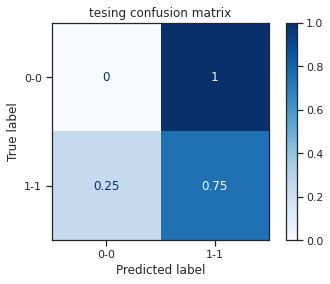

Normalized confusion matrix training set
[[0.923 0.077]
 [0.308 0.692]]


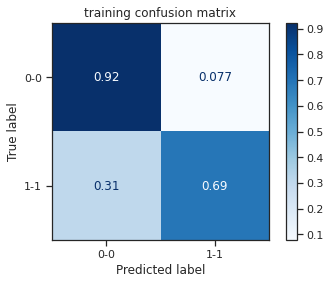

In [79]:
model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train_res, y_train_res)
ytrain_predict = model.predict(x_train_res)
ytest_predict = model.predict(x_test)
ytrain_predict_prob=model.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=model.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = model.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
XGBoost_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % XGBoost_train_auc)
# calculate roc curve
XGBoost_train_fpr, XGBoost_train_tpr, XGBoost_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGBoost_train_fpr, XGBoost_train_tpr)

# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGBoost_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % XGBoost_test_auc)
# calculate roc curve
XGBoost_test_fpr, XGBoost_test_tpr, XGBoost_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGBoost_test_fpr, XGBoost_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
XGBoost_train_acc=model.score(x_train_res,y_train_res) 
print(XGBoost_train_acc)
print(classification_report(y_train_res, ytrain_predict))
XGBoost_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(XGBoost_metrics).transpose()
XGBoost_train_precision=round(df.loc["1"][1],2)
XGBoost_train_recall=round(df.loc["1"][2],2)
XGBoost_train_f1=round(df.loc["1"][0],2)
print ('XGBoost_train_precision ',XGBoost_train_precision)
print ('XGBoost_train_recall ',XGBoost_train_recall)
print ('XGBoost_train_f1 ',XGBoost_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
XGBoost_test_acc=model.score(x_test,y_test)
print(XGBoost_test_acc)
print(classification_report(y_test, ytest_predict))
XGBoost_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(XGBoost_metrics).transpose()
XGBoost_test_precision=round(df.loc["1"][1],2)
XGBoost_test_recall=round(df.loc["1"][2],2)
XGBoost_test_f1=round(df.loc["1"][0],2)
print ('XGBoost_test_precision ',XGBoost_test_precision)
print ('XGBoost_test_recall ',XGBoost_test_recall)
print ('XGBoost_test_f1 ',XGBoost_test_f1)
plotconftmat(["0","1"], y_test, model)

In [80]:
from sklearn.neural_network import MLPClassifier
param_grid = {
            'hidden_layer_sizes': [(100,100,100)],
            'activation': ['logistic', 'relu'],
            'solver': ['sgd', 'adam'],
            'tol': [0.1,0.01],
            'max_iter' : [10000]
            }
model = MLPClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10)
print("grid search\n",grid_search)
grid_search.fit(x_train_res, y_train_res)
print("grid search fit\n",grid_search.fit(x_train_res, y_train_res))
print("grid search best params\n",grid_search.best_params_)
best_grid = grid_search.best_estimator_
print("best grid\n",best_grid)
ytrain_predict = best_grid.predict(x_train_res)
ytest_predict = best_grid.predict(x_test)

grid search
 GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat..., shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             

y train pred head 
           0         1
0  0.636452  0.363548
1  0.169507  0.830493
2  0.361320  0.638680
3  0.173467  0.826533
4  0.546945  0.453055
y test pred head 
           0         1
0  0.636452  0.363548
1  0.169507  0.830493
2  0.361320  0.638680
3  0.173467  0.826533
4  0.546945  0.453055
best_grid cv score [0.667 0.5   0.2   0.6   0.6   0.8   0.8   0.8   1.    0.6  ]

mean cv score 0.6566666666666666
AUC: 0.791
AUC: 0.750
[[17  9]
 [ 9 17]]
0.6538461538461539
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.65      0.65      0.65        26

    accuracy                           0.65        52
   macro avg       0.65      0.65      0.65        52
weighted avg       0.65      0.65      0.65        52

ANN_train_precision  0.65
ANN_train_recall  0.65
ANN_train_f1  0.65
[[0 1]
 [1 3]]
0.6
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1

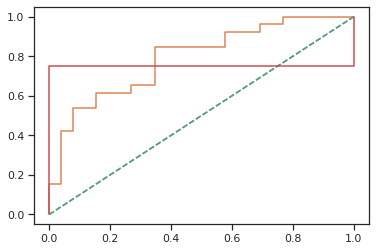

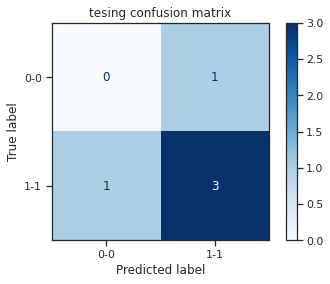

Confusion matrix, without normalization training set
[[17  9]
 [ 9 17]]


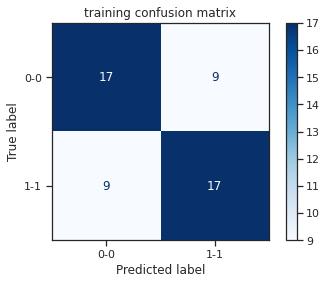

Normalized confusion matrix testing set
[[0.   1.  ]
 [0.25 0.75]]


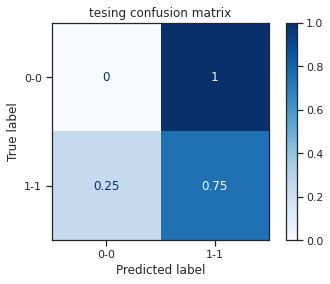

Normalized confusion matrix training set
[[0.654 0.346]
 [0.346 0.654]]


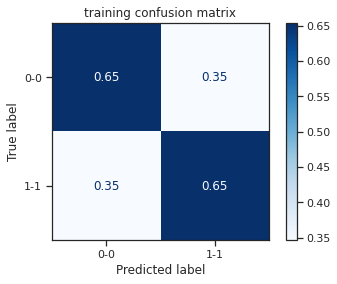

In [82]:
ytrain_predict_prob=best_grid.predict_proba(x_train_res)
print("y train pred head \n",pd.DataFrame(ytrain_predict_prob).head())
ytest_predict_prob=best_grid.predict_proba(x_train_res)
print("y test pred head \n",pd.DataFrame(ytest_predict_prob).head())
scores = cross_val_score(best_grid, x_train_res, y_train_res, cv=10)
print("best_grid cv score {}\n".format(scores))
print("mean cv score",scores.mean())

# predict probabilities
probs = best_grid.predict_proba(x_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
ANN_train_auc = roc_auc_score(y_train_res, probs)
# calculate AUC
print('AUC: %.3f' % ANN_train_auc)
# calculate roc curve
ANN_train_fpr, ANN_train_tpr, ANN_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid
plt.plot(ANN_train_fpr, ANN_train_tpr)

# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ANN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ANN_test_auc)
# calculate roc curve
ANN_test_fpr, ANN_test_tpr, ANN_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the best_grid
plt.plot(ANN_test_fpr, ANN_test_tpr)


print(confusion_matrix(y_train_res, ytrain_predict))
#Train Data Accuracy
ANN_train_acc=best_grid.score(x_train_res,y_train_res) 
print(ANN_train_acc)
print(classification_report(y_train_res, ytrain_predict))
ANN_metrics=classification_report(y_train_res, ytrain_predict,output_dict=True)
df=pd.DataFrame(ANN_metrics).transpose()
ANN_train_precision=round(df.loc["1"][1],2)
ANN_train_recall=round(df.loc["1"][2],2)
ANN_train_f1=round(df.loc["1"][0],2)
print ('ANN_train_precision ',ANN_train_precision)
print ('ANN_train_recall ',ANN_train_recall)
print ('ANN_train_f1 ',ANN_train_f1)

print(confusion_matrix(y_test, ytest_predict))
#Test Data Accuracy
ANN_test_acc=best_grid.score(x_test,y_test)
print(ANN_test_acc)
print(classification_report(y_test, ytest_predict))
ANN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(ANN_metrics).transpose()
ANN_test_precision=round(df.loc["1"][1],2)
ANN_test_recall=round(df.loc["1"][2],2)
ANN_test_f1=round(df.loc["1"][0],2)
print ('ANN_test_precision ',ANN_test_precision)
print ('ANN_test_recall ',ANN_test_recall)
print ('ANN_test_f1 ',ANN_test_f1)
plotconftmat(["0","1"], y_test, best_grid)

In [83]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
metdata = pd.DataFrame({'logit Train':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
        'logit Test':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
       'NaiveBayes Train':[NaiveBayes_train_acc,NaiveBayes_train_auc,NaiveBayes_train_recall,NaiveBayes_train_precision,NaiveBayes_train_f1],
        'NaiveBayes Test':[NaiveBayes_test_acc,NaiveBayes_test_auc,NaiveBayes_test_recall,NaiveBayes_test_precision,NaiveBayes_test_f1],
        'DecisionTree Train':[DecisionTree_train_acc,DecisionTree_train_auc,DecisionTree_train_recall,DecisionTree_train_precision,DecisionTree_train_f1],
        'DecisionTree Test':[DecisionTree_test_acc,DecisionTree_test_auc,DecisionTree_test_recall,DecisionTree_test_precision,DecisionTree_test_f1],
        'RandomForest Train':[RandomForest_train_acc,RandomForest_train_auc,RandomForest_train_recall,RandomForest_train_precision,RandomForest_train_f1],
        'RandomForest Test':[RandomForest_test_acc,RandomForest_test_auc,RandomForest_test_recall,RandomForest_test_precision,RandomForest_test_f1],
        'SVM Train':[SVM_train_acc,SVM_train_auc,SVM_train_recall,SVM_train_precision,SVM_train_f1],
        'SVM Test':[SVM_test_acc,SVM_test_auc,SVM_test_recall,SVM_test_precision,SVM_test_f1],
        'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'AdaBoost Train':[AdaBoost_train_acc,AdaBoost_train_auc,AdaBoost_train_recall,AdaBoost_train_precision,AdaBoost_train_f1],
        'AdaBoost Test':[AdaBoost_test_acc,AdaBoost_test_auc,AdaBoost_test_recall,AdaBoost_test_precision,AdaBoost_test_f1],
        'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
        'XGBoost Train':[XGBoost_train_acc,XGBoost_train_auc,XGBoost_train_recall,XGBoost_train_precision,XGBoost_train_f1],
        'XGBoost Test':[XGBoost_test_acc,XGBoost_test_auc,XGBoost_test_recall,XGBoost_test_precision,XGBoost_test_f1],
        'ANN Train':[ANN_train_acc,ANN_train_auc,ANN_train_recall,ANN_train_precision,ANN_train_f1],
        'ANN Test':[ANN_test_acc,ANN_test_auc,ANN_test_recall,ANN_test_precision,ANN_test_f1]
       },index=index)
print(round(metdata,2))
metdata.T.to_csv('Metrics.csv')

           logit Train  logit Test  ...  ANN Train  ANN Test
Accuracy          0.63        0.80  ...       0.65      0.60
AUC               0.78        0.75  ...       0.79      0.75
Recall            0.63        0.89  ...       0.65      0.75
Precision         0.62        1.00  ...       0.65      0.75
F1 Score          0.64        0.80  ...       0.65      0.75

[5 rows x 20 columns]


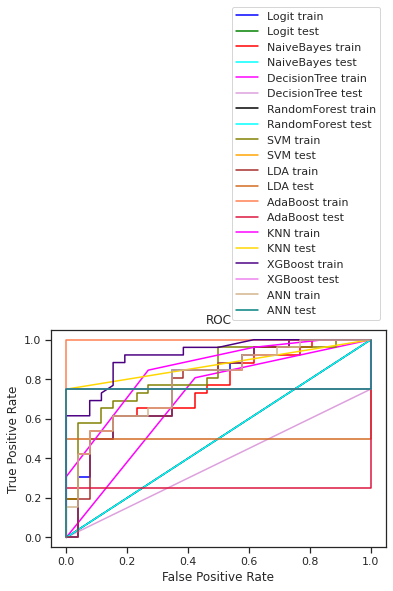

In [84]:
# https://matplotlib.org/tutorials/colors/colors.html
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='blue',label="Logit train")
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label="Logit test")
plt.plot(NaiveBayes_train_fpr, NaiveBayes_train_tpr,color='red',label="NaiveBayes train")
plt.plot(NaiveBayes_test_fpr, NaiveBayes_test_tpr,color='cyan',label="NaiveBayes test")
plt.plot(DecisionTree_train_fpr, DecisionTree_train_tpr,color='magenta',label="DecisionTree train")
plt.plot(DecisionTree_test_fpr, DecisionTree_test_tpr,color='plum',label="DecisionTree test")
plt.plot(RandomForest_train_fpr, RandomForest_train_tpr,color='black',label="RandomForest train")
plt.plot(RandomForest_test_fpr, RandomForest_test_tpr,color='aqua',label="RandomForest test")
plt.plot(SVM_train_fpr, SVM_train_tpr,color='olive',label="SVM train")
plt.plot(SVM_test_fpr, SVM_test_tpr,color='orange',label="SVM test")
plt.plot(LDA_train_fpr, LDA_train_tpr,color='brown',label="LDA train")
plt.plot(LDA_test_fpr, LDA_test_tpr,color='chocolate',label="LDA test")
plt.plot(AdaBoost_train_fpr, AdaBoost_train_tpr,color='coral',label="AdaBoost train")
plt.plot(AdaBoost_test_fpr, AdaBoost_test_tpr,color='crimson',label="AdaBoost test")
plt.plot(KNN_train_fpr, KNN_train_tpr,color='fuchsia',label="KNN train")
plt.plot(KNN_test_fpr, KNN_test_tpr,color='gold',label="KNN test")
plt.plot(XGBoost_train_fpr, XGBoost_train_tpr,color='indigo',label="XGBoost train")
plt.plot(XGBoost_test_fpr, XGBoost_test_tpr,color='violet',label="XGBoost test")
plt.plot(ANN_train_fpr, ANN_train_tpr,color='tan',label="ANN train")
plt.plot(ANN_test_fpr, ANN_test_tpr,color='teal',label="ANN test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [86]:
# https://kite.com/python/answers/how-to-append-an-element-to-a-key-in-a-dictionary-with-python
# https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
def modedev(modelname):
    x = data.drop(columns=["winner_name"])
    y = data["winner_name"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    sm = SMOTE(random_state=2)
    x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
    if modelname=="NB":
        model = GaussianNB()
    if modelname=="Logit":
        model = LogisticRegression()
    if modelname=="Tree":
        model = tree.DecisionTreeClassifier()
    if modelname=="RF":
        model = RandomForestClassifier(n_estimators=100)
    if modelname=="SVM":
        model = svm.SVC()
    if modelname=="LDA":
        model = LinearDiscriminantAnalysis()
    if modelname=="Adaboost":
        model = AdaBoostClassifier(n_estimators=100)
    if modelname=="KNN":
        model = KNeighborsClassifier()
    if modelname=="XGB":
        model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
    if modelname=="ANN":
        model = MLPClassifier()
   
    metaccuracydict = {}
#     metaccdicarr={}
    model = model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    model_score = model.score(x_test, y_test)
    print("-------testing set-----\n")
    modeltype = "normal"
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    metaccuracydict.update({modelname+modeltype+" test":model_score})
#     if modelname+modeltype+" test" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" test"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" test"] = [model_score]
    print("model type {} model name {} Conf mat score {} classification report {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_test, y_predict),classification_report(y_test, y_predict)))
    model_score = model.score(x_train, y_train)
    print("-------training set-----\n")
    y_predict = model.predict(x_train)
    model_score = model.score(x_train, y_train)
    metaccuracydict.update({modelname+modeltype+" train":model_score})
#     if modelname+modeltype+" train" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" train"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" train"] = [model_score]
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    print("model type {} model name {} Conf mat score {} classification reeport {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_train, y_predict),classification_report(y_train, y_predict)))
# cross validation
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print("model type {} model name {} model cv score {}\n".format(modeltype, modelname, scores))
    
    
    model = model.fit(x_train_res, y_train_res)
    y_predict = model.predict(x_test)
    model_score = model.score(x_test, y_test)
    modeltype = "smote"
    metaccuracydict.update({modelname+modeltype+" test":model_score})
#     if modelname+modeltype+" test" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" test"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" test"] = [model_score]
    print("------testing set------\n")
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    print("model type {} model name {} Conf mat score {} classification report {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_test, y_predict),classification_report(y_test, y_predict)))
    print("-------training set-----\n")
    y_predict = model.predict(x_train_res)
    model_score = model.score(x_train_res, y_train_res)
    metaccuracydict.update({modelname+modeltype+" train":model_score})
#     if modelname+modeltype+" test" in metaccdicarr:
#         metaccdicarr[modelname+modeltype+" train"].append(model_score)
#     else:
#         metaccdicarr[modelname+modeltype+" train"] = [model_score]
    print("model type {} model name {} model score {}\n".format(modeltype, modelname, model_score))
    print("model type {} model name {} Conf mat score {} classification report {} \n".format(modeltype, modelname, metrics.confusion_matrix(y_train_res, y_predict),classification_report(y_train_res, y_predict)))
# cross validation
    scores = cross_val_score(model, x_train_res, y_train_res, cv=10)
    print("model type {} model name {} model cv score {}\n".format(modeltype, modelname, scores))
    print(metaccuracydict)
#     print(metaccdicarr)
    
    
    
#     model, y_predict, model_score, modeltype, scores = normalvalidation(modelname, x_train, x_test, y_train, y_test, model)
#     smotevalidation(modelname, x_test, y_test, x_train_res, y_train_res, model, y_predict, model_score, modeltype, scores)
        
modedev("NB")
modedev("Logit")
modedev("Tree")
modedev("RF")
modedev("SVM")
modedev("LDA")
modedev("Adaboost")
modedev("KNN")
modedev("XGB")
modedev("ANN")

-------testing set-----

model type normal model name NB model score 0.8

model type normal model name NB Conf mat score [[1 0]
 [1 3]] classification report               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5
 

-------training set-----

model type normal model name NB model score 0.7111111111111111

model type normal model name NB Conf mat score [[21  5]
 [ 8 11]] classification reeport               precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.69      0.58      0.63        19

    accuracy                           0.71        45
   macro avg       0.71      0.69      0.70        45
weighted avg       0.71      0.71      0.71        45
 

model